Будем использовать датасет https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
Целью работы будет разобраться на базовом уровне в работе в области data science и посмотреть какие модели смогут лучше предсказать популярность фильма до его выхода.(тоесть мы не будем испльзовать данные которые можно получить только после выхода фильма)

Импортируем необходимые библиотеки

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

Наш датасет содержит два файла **movie.csv** и **credits.csv**

Посмотрим содержимое первых пяти строк файла **movie.csv** и **credits.csv**

In [328]:
data_movie = pd.read_csv('movie.csv')
data_movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [329]:
data_credit = pd.read_csv('credits.csv')
data_credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# EDA

Проверим какие столбцы присутстствуют в в файле **movie.csv**

In [330]:
data_movie.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Посмотрим на второй файл **credits.csv**

In [331]:
data_credit.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

Объединим два файла по ID

In [332]:
data_credit.columns = ['id','title','cast','crew']
data_all= data_movie.merge(data_credit,on='id')

Посмотрим на объеденённые данные

In [333]:
data_all.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Для задачи предсказания популярности трека столбец **ID** не несет никакой полезной информации, поэтому удалим его, также у нас образовались столбцы дубликаты **title_x**, **title_y** удалим один из них.

In [334]:
data = data_all.drop(['id','title_y'], axis = 1)
data.rename(columns={'title_x': 'title'}, inplace=True)
data.head()

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  status                4803 non-null   object 
 15  tagline              

# Описание датасета фильмов
Размер датасета: 4803 строк (фильмов), 20 признака (столбца)

Целевая переменная: popularity — популярность фильма

# Типы признаков:
## Числовые признаки (6):
* **budget** — бюджет фильма (целое число)

* **popularity** — популярность (вещественное число)

* **revenue** — доход от проката (целое число)

* **runtime** — продолжительность фильма в минутах (вещественное число)

* **vote_average** — средняя оценка (вещественное число)

**vote_count** — количество голосов (целое число)

## Категориальные и текстовые признаки (15):
* **original_language** — язык оригинальной версии

* **status** — статус фильма ("Released", "Rumored" и т. д.)

* **genres** — жанры (может содержать несколько жанров, закодированы в строке)

* **production_companies** — киностудии

* **production_countries** — страны производства

* **spoken_languages** — языки, на которых говорят персонажи

* **cast** — актёрский состав (строка со списком актёров)

* **crew** — съёмочная группа (строка с ролями и именами)

* **original_title** — оригинальное название

* **title** —  названия фильма

* **overview** — краткое описание фильма

* **tagline** — слоган

* **keywords** — ключевые слова, теги

* **homepage** — ссылка на сайт фильма

* **release_date** — дата выхода фильма

## Пропуски
Столбцы с пропусками:

* **homepage** — много пропусков (4803 → 1712)

* **overview** — 3 пропуска

* **release_date** — 1 пропуск

* **runtime** — 2 пропуска

* **tagline** — много пропусков (3959/4803)

Что делаем:

* **homepage** - нужно удалить, так как нерелевантно содержит URL сайта — для модели бесполезно

* **overview** - заполним пустой строкой

* **release_date** - удалим 1 строку

* **runtime** - заполнить медианным значением	Малое количество пропусков, медиана устойчива к выбросам

* **tagline** - заполним пустой строкой как overview

In [336]:
# удаление столбца homepage
data.drop(columns='homepage', inplace=True)

# заполнение overview и tagline
data['overview'] = data['overview'].fillna('')
data['tagline'] = data['tagline'].fillna('')

# удаление строки без даты
data = data.dropna(subset=['release_date']).reset_index(drop=True)

# заполнение runtime медианным значением
data['runtime'] = data['runtime'].fillna(data['runtime'].median())


Для числовых признаков выполним базовый первичный анализ с помощью метода describe()

In [337]:
data.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.802000e+03,4802.000000,4.802000e+03,4802.000000,4802.000000,4802.000000
mean,2.905109e+07,21.496776,8.227777e+07,106.896501,6.093440,690.361724
std,4.072447e+07,31.818451,1.628697e+08,22.557033,1.191496,1234.674268
min,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,4.671734,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.924931,1.917498e+07,103.000000,6.200000,235.500000
75%,4.000000e+07,28.332017,9.291920e+07,117.750000,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## runtime (длительность фильма)

* Среднее значение: ~107 минут

* Минимальное: 0 (возможно, ошибка в данных — требует обработки)

* Максимальное: 338 минут (почти 6 часов, вероятно, редкий случай)

* Стандартное отклонение: около 25 минут — разброс средний, фильмы различаются по продолжительности, но без экстремальных выбросов.

## budget (бюджет)
* Среднее значение: очень высокое, но при этом

* Медиана: довольно низкая, что говорит о том что большая часть фильмов мало бюджетная или бюджет и вовсе отсутствует, тоесть значение 0

* Максимум: огромные значения, вероятно, блокбастеры

## popularity
Распределение сильно смещено вправо:

* Медиана — ~13

* Максимум — 875 — вероятно, один или несколько вирусных хитов

## vote_average и vote_count
* vote_average: диапазон от 0 до 10, распределение похоже на нормальное

* vote_count: также сильно смещено вправо, возможны выбросы

Общий вывод:
Некоторые признаки (например, budget, runtime) имеют аномальные значения (нули или экстремумы), что требует обработки.

Распределения части признаков не являются нормальными, есть выбросы.

Некоторые признаки могут потребовать нормализации.

### Подробнее посмотрим какие числовые признаки являются 0

In [338]:
data[['budget', 'revenue', 'runtime','popularity']].isin([0]).sum()

budget        1036
revenue       1426
runtime         34
popularity       0
dtype: int64

Мы видим что у  довольно большой части фильмов отсутсвует информация о бюджете и выручке. Так же есть небольшое число фильмов с неизвестной длительностью

Посмотрим есть ли у нас отсутвствующие данные для признаков представленных списками

In [339]:
list_columns = ['genres', 'cast','production_companies','production_countries','spoken_languages'] 

for col in list_columns:
    empty_count = (data[col] == "[]").sum()
    print(f"Столбец '{col}': {empty_count} пустых списков")


Столбец 'genres': 27 пустых списков
Столбец 'cast': 42 пустых списков
Столбец 'production_companies': 350 пустых списков
Столбец 'production_countries': 173 пустых списков
Столбец 'spoken_languages': 85 пустых списков


In [340]:
# Количество уникальных значений в категориальных признаках
cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(f"{col}: {data[col].nunique()} уникальных значений")


genres: 1175 уникальных значений
keywords: 4222 уникальных значений
original_language: 37 уникальных значений
original_title: 4800 уникальных значений
overview: 4800 уникальных значений
production_companies: 3697 уникальных значений
production_countries: 469 уникальных значений
release_date: 3280 уникальных значений
spoken_languages: 544 уникальных значений
status: 3 уникальных значений
tagline: 3945 уникальных значений
title: 4799 уникальных значений
cast: 4761 уникальных значений
crew: 4776 уникальных значений


Мы видем что у многих признаков почти все значение уникальные, это делает их малоэфективными для создание модели, тем неменее на основе их можно будет создать более подходящие признаки для работы

Посмотрим на распределение таргетной переменной

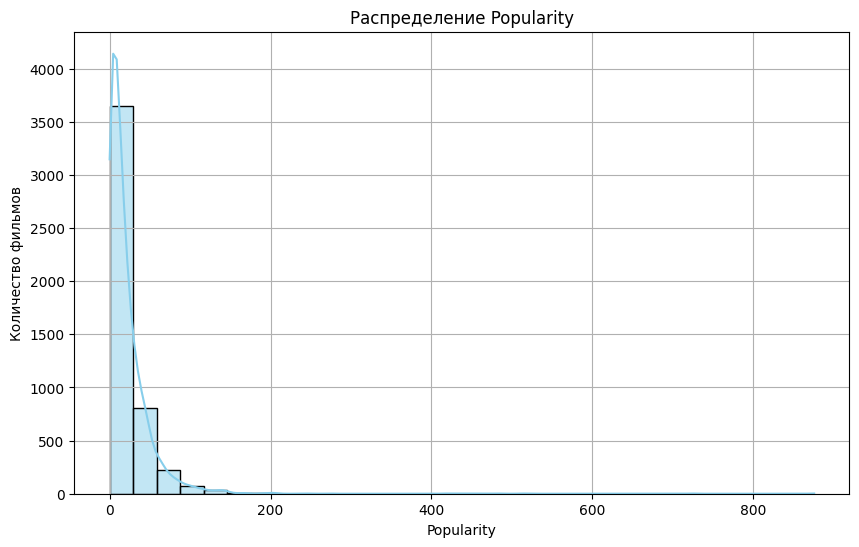

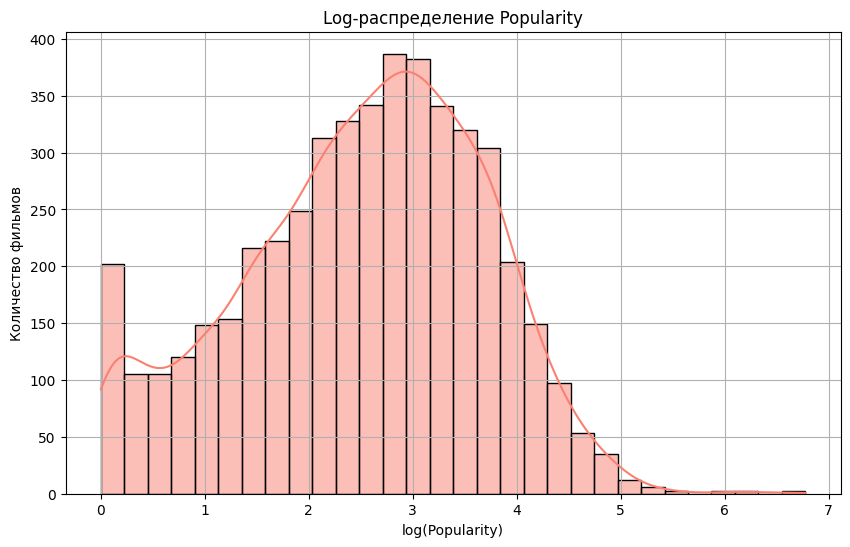

In [341]:
# Обычное распределение popularity
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], bins=30, kde=True, color='skyblue')
plt.title('Распределение Popularity')
plt.xlabel('Popularity')
plt.ylabel('Количество фильмов')
plt.grid(True)
plt.show()

# Логарифмическое распределение (игнорируем нули, если они есть)
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(data['popularity']), bins=30, kde=True, color='salmon')
plt.title('Log-распределение Popularity')
plt.xlabel('log(Popularity)')
plt.ylabel('Количество фильмов')
plt.grid(True)
plt.show()

 Видим, что распределение popularity имеет выраженное смещение вправо: большинство фильмов имеют низкую популярность, а несколько выбиваются в суперхиты. Используем boxplot, чтобы лучше убедиться в этом

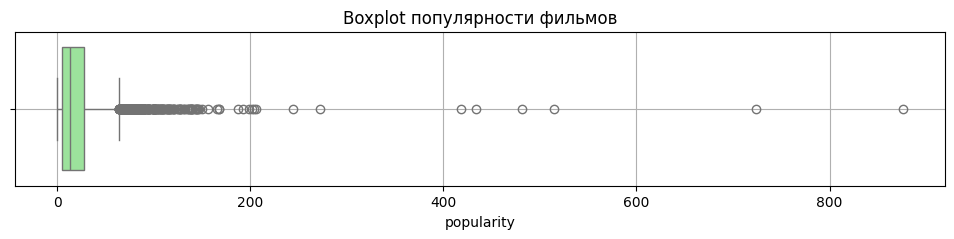

In [342]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=data['popularity'], color='lightgreen')
plt.title('Boxplot популярности фильмов')
plt.grid(True)
plt.show()


Построим корреляционную матрицу, чтобы посмотреть на взаимосвязь числовых признаков

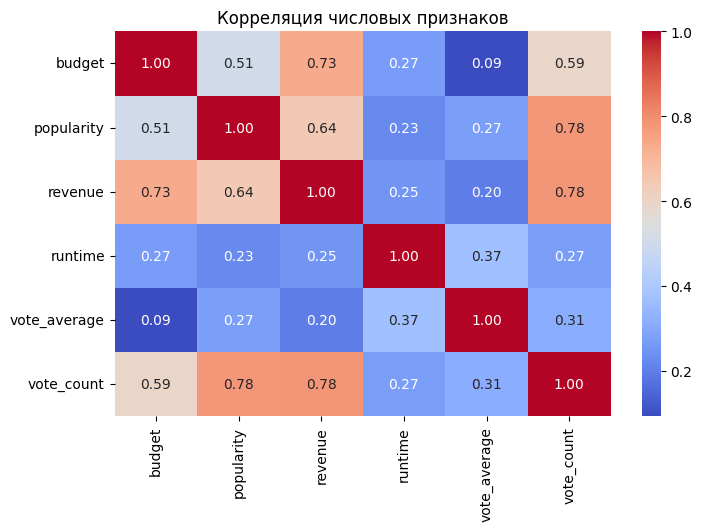

In [343]:
import seaborn as sns
import matplotlib.pyplot as plt

# Выбираем только числовые признаки
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Корреляционная матрица
corr = data[num_cols].corr()

# Отобразим только связи с popularity
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Корреляция числовых признаков')
plt.show()


Признак genres представлен строкой где указаны все жанры фильма. Используем MultiLabelBinarizer, чтобы получить признаки принадлжености к тому или иному жанру 

Text(0, 0.5, 'Жанр')

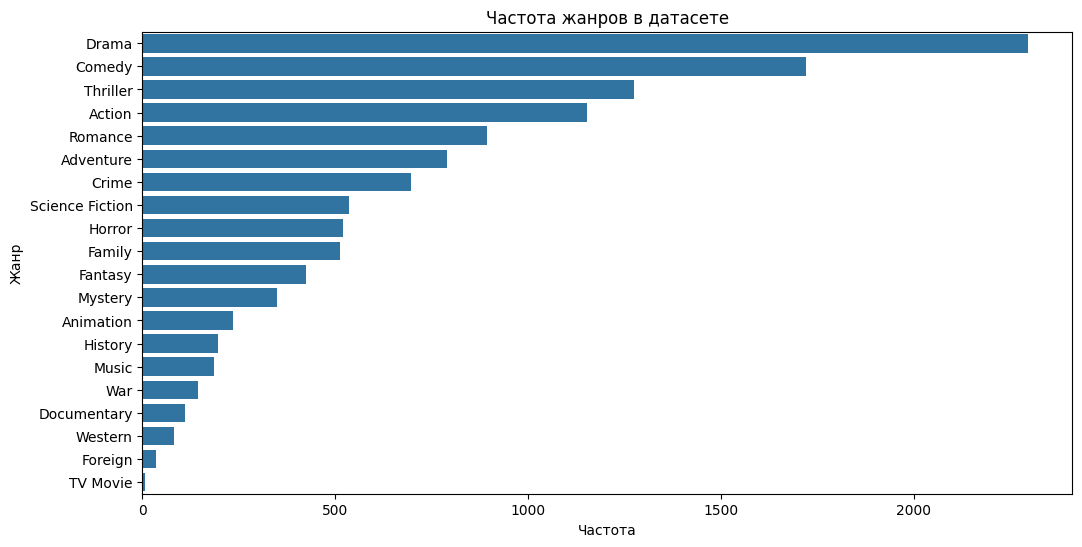

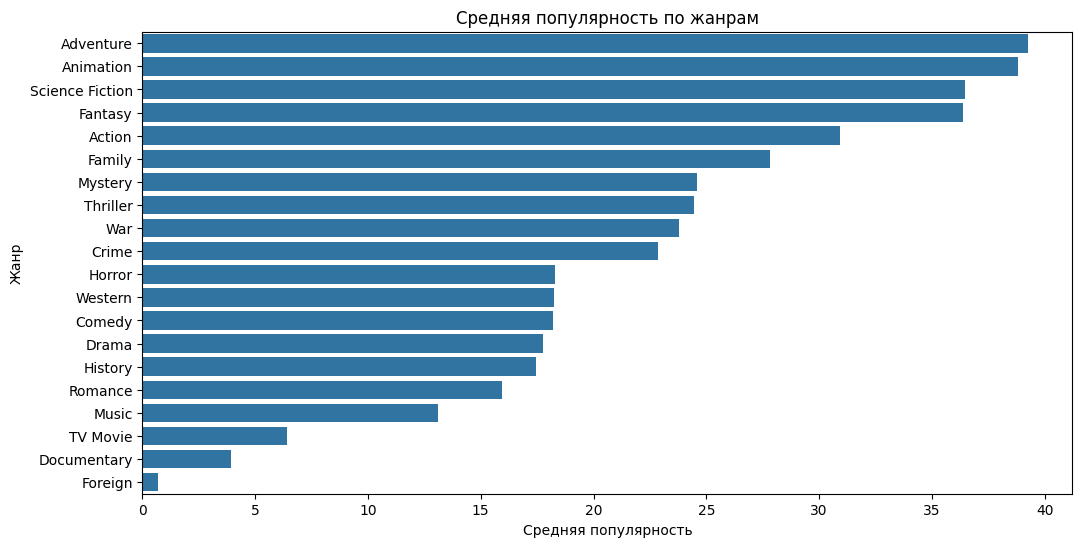

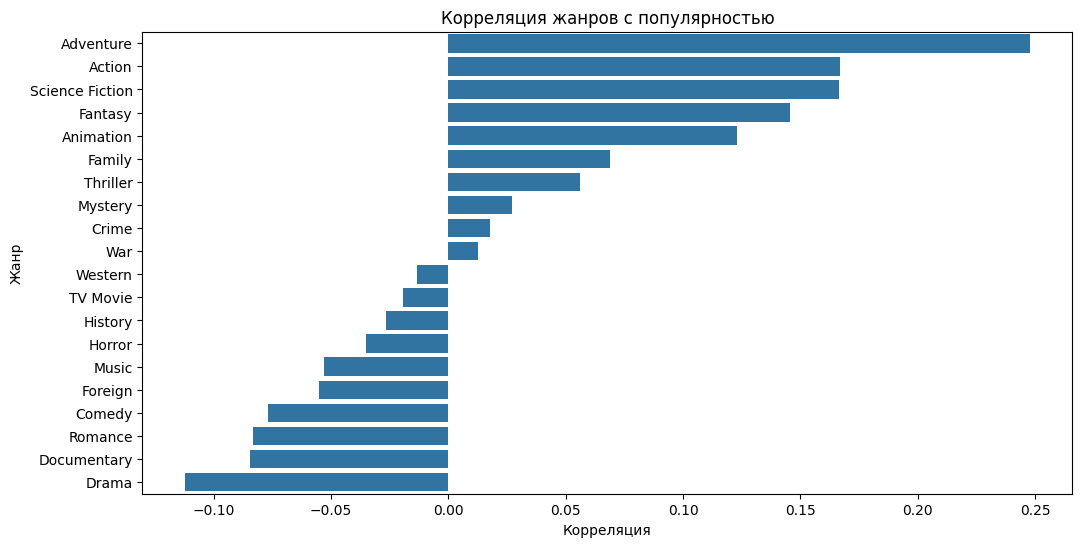

In [344]:
import ast

def extract_genres(text):
    try:
        genres = [d["name"] for d in ast.literal_eval(text)]
        return genres
    except:
        return []
 
data["genres_list"] = data["genres"].apply(extract_genres)

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(data["genres_list"]), columns=mlb.classes_)
data = pd.concat([data, genres_encoded], axis=1)

all_genres = data['genres_list'].explode()
genre_counts = all_genres.value_counts()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Частота жанров в датасете')
plt.xlabel('Частота')
plt.ylabel('Жанр')

genre_target_means = data[genres_encoded.columns].apply(
    lambda col: data['popularity'][col == 1].mean()
).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=genre_target_means.values, y=genre_target_means.index)
plt.title('Средняя популярность по жанрам')
plt.xlabel('Средняя популярность')
plt.ylabel('Жанр')

correlations = data[genres_encoded.columns].corrwith(data['popularity']).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Корреляция жанров с популярностью')
plt.xlabel('Корреляция')
plt.ylabel('Жанр')

Самые многичеленные по числу фильмов жанры это Драма и Комедия, самые популярные в среднем это Adventure и Animation, при этом самую высокую кореляцию с популярностью имееют фильмы с жанрами Adventure, Action, Science Fiction

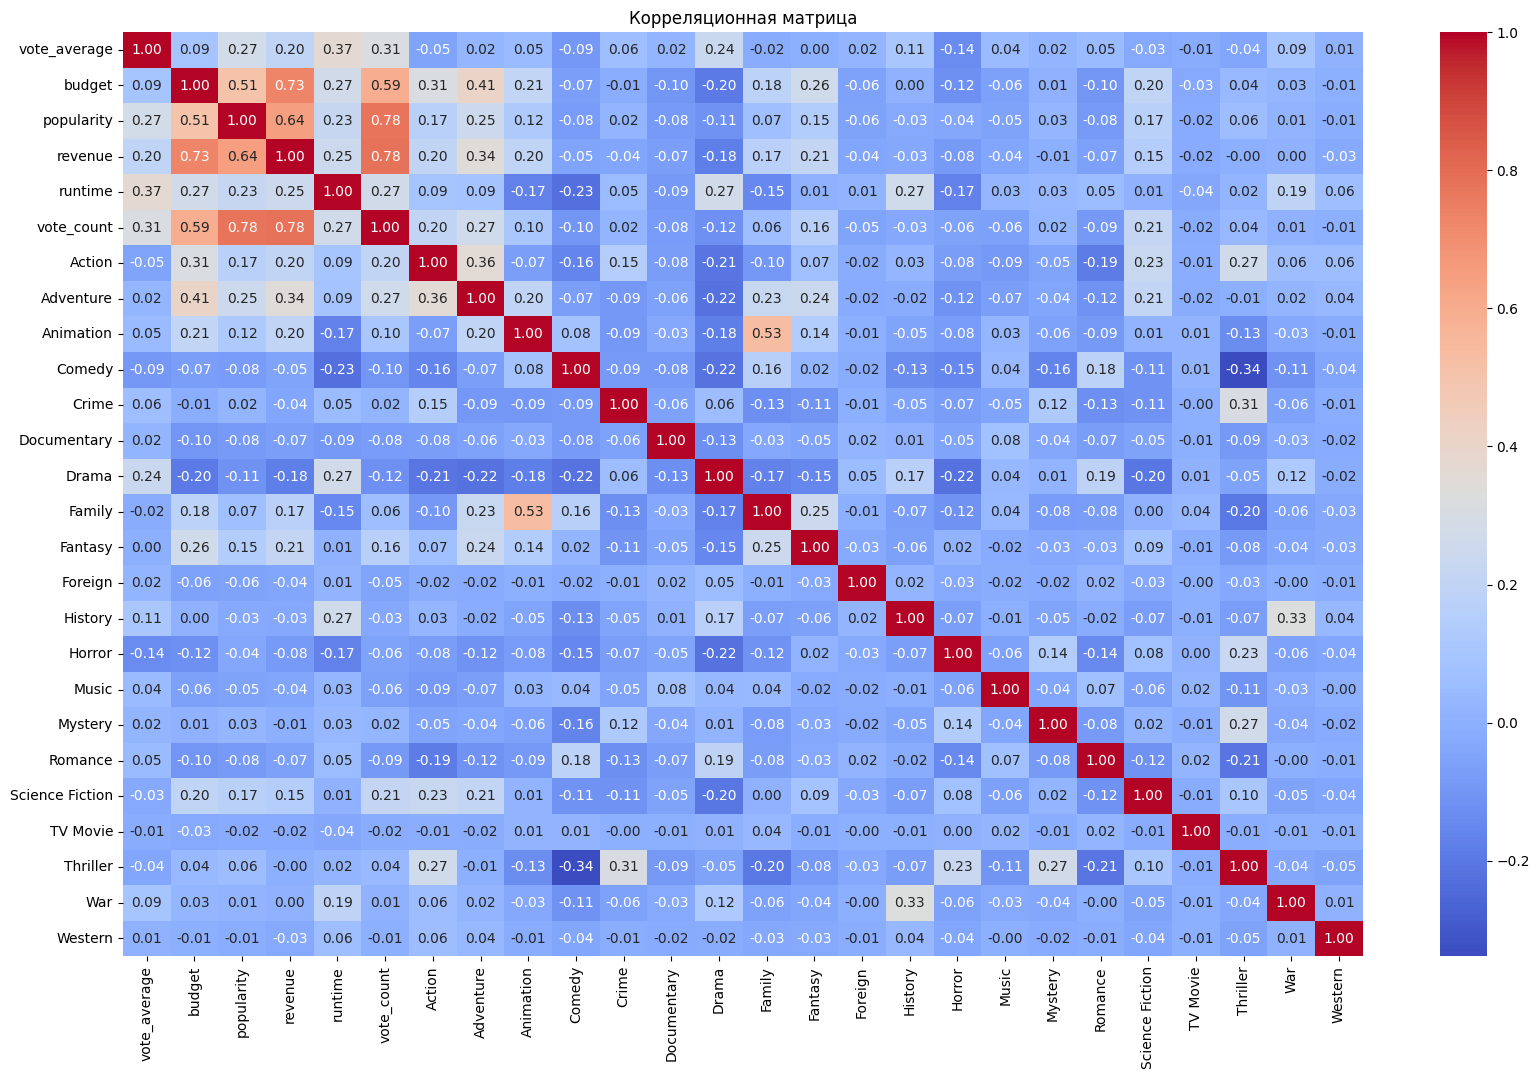

In [345]:
corr_all = data[[
    "vote_average", "budget", "popularity", "revenue", "runtime", "vote_count"
     
] + list(genres_encoded.columns) ].corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_all, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()


# Анализ матрицы корреляции по датасету фильмов:
Сильная положительная корреляция между budget и revenue (0.73)
Это ожидаемо: чем выше бюджет фильма, тем выше, как правило, его сборы. Однако стоит помнить, что это не абсолютное правило — есть и малобюджетные успешные фильмы.

Положительная корреляция между popularity и vote_count (0.78), а также revenue (0.64)
Популярные фильмы, предсказуемо, собирают больше голосов и денег. Это логично: чем больше людей о фильме знает — тем выше показатели.

runtime и vote_average (0.38)
Достаточно интересный момент: более длинные фильмы получают немного выше средний рейтинг. Возможно, это связано с тем, что длинные фильмы чаще бывают более серьёзными проектами.

Корреляция между budget и vote_count (0.59)
Фильмы с высоким бюджетом привлекают больше зрителей и, соответственно, получают больше оценок.

Жанры и бюджет/популярность:

Adventure и budget (0.41) — приключенческие фильмы часто дорогостоящие.

Action и budget (0.31) — боевики тоже обычно требуют немалых затрат.

Science Fiction и budget (0.20) — фантастика обычно дороже.

Интересная отрицательная корреляция budget с жанром Romance (-0.10)
Романтические фильмы, как правило, обходятся дешевле и не требуют крупных бюджетов.

Умеренная положительная связь runtime и жанра War (0.19)
Военные фильмы чаще получаются более продолжительными.

Не очень большая связь между vote_average и popularity (0.27)
Это означает, что популярность фильма слабо говорит о его среднем рейтинге. То есть популярные фильмы не всегда лучшие по оценкам.

Минимальная связь между жанрами и vote_average
Почти все жанры имеют слабую корреляцию с рейтингами, что говорит о том, что качество (по оценке зрителей) не сильно зависит от жанра.
Тем неменее историческии фильмы в среднем получают лучшие оценки, а хорор фильм худшиие

# Выводы:
Самая сильная связь — между бюджетом и кассовыми сборами.

Популярность фильма сильно связана с количеством голосов и выручкой.

Более длинные фильмы чуть лучше оцениваются.

Фильмы с крупным бюджетом чаще снимаются в популярных жанрах (приключения, боевик, фантастика).

Популярность ≠ высокий рейтинг.

Жанры почти не влияют на средний рейтинг.


Посмотрим на кореляцию с таргетной переменной

In [346]:
correlation_with_target = corr_all['popularity'].sort_values(ascending=False)
correlation_with_target

popularity         1.000000
vote_count         0.778114
revenue            0.644700
budget             0.505364
vote_average       0.273990
Adventure          0.247866
runtime            0.225398
Action             0.166947
Science Fiction    0.166444
Fantasy            0.145651
Animation          0.123190
Family             0.068876
Thriller           0.055971
Mystery            0.027149
Crime              0.017554
War                0.012603
Western           -0.013508
TV Movie          -0.019398
History           -0.026342
Horror            -0.035022
Music             -0.052821
Foreign           -0.055234
Comedy            -0.076988
Romance           -0.083200
Documentary       -0.084467
Drama             -0.112325
Name: popularity, dtype: float64

# Анализ корреляций с popularity

# Самые сильные корреляции:

vote_count(0.78) - Очень сильная, почти прокси для popularity. Прямое data leakage. Необходимо будет убрать

revenue(0.64) - Высокая связь. Поскольку кассовые сборы формируются после релиза, а в нашей задачи мы хотим создать модель которая будет пресказывать популярность до, необходимо будет удалить

budget(0.51) - Отличная объясняющая переменная.

# Умеренные корреляции:

vote_average(0.27) - Умеренная связь, но vote_average формируеться после выхода фильма что не подходит по смыслу задачи. Нужно удалить

Adventure(0.25) - Жанр Adventure связан с массовым прокатом. Полезная категориальная фича.

runtime(0.23) - Оставляем — в совокупности с жанрами даёт эффект.

Action, Sci-Fi, Fantasy, Animation(0.12 — 0.17) - Полезные жанровые признаки.

# Низкие корреляции и отрицательные корреляции

Comedy, Romance, Drama, Horror — умеренно отрицательные. 

status_encoded — практически нулевая. В дальнейшем лучше убрать

Проанализируем признак budget, учтем что мы обнаружили что у признаке присутсвет большое количество 0 значений

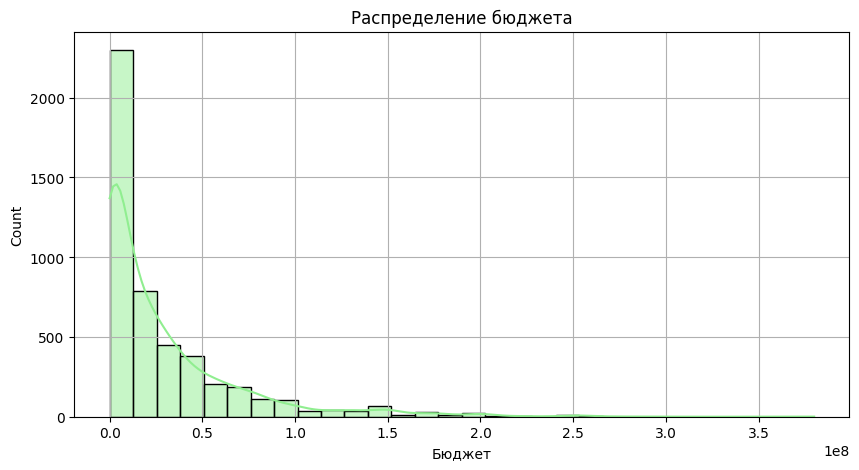

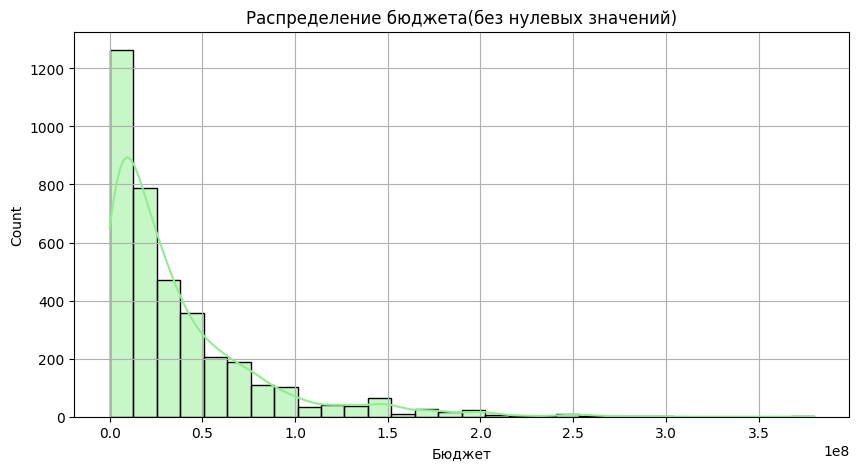

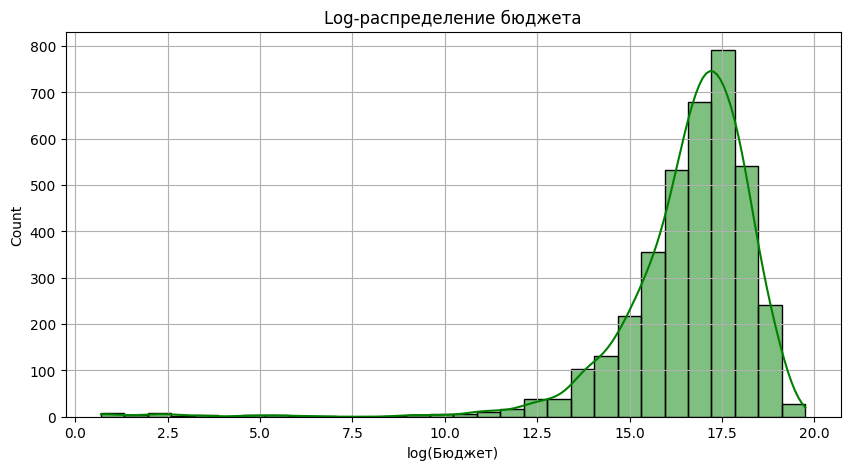

In [347]:
plt.figure(figsize=(10, 5))
sns.histplot(data['budget'], bins=30, kde=True, color='lightgreen')
plt.title('Распределение бюджета')
plt.xlabel('Бюджет')
plt.grid(True)
plt.show()

# Budget (исключим 0 значения)
plt.figure(figsize=(10, 5))
sns.histplot(data[data['budget'] > 0]['budget'], bins=30, kde=True, color='lightgreen')
plt.title('Распределение бюджета(без нулевых значений)')
plt.xlabel('Бюджет')
plt.grid(True)
plt.show()

# Логарифм бюджета
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(data[data['budget'] > 0]['budget']), bins=30, kde=True, color='green')
plt.title('Log-распределение бюджета')
plt.xlabel('log(Бюджет)')
plt.grid(True)
plt.show()


## Проанализируем полученные данные

Даже после исключения нулевых значений, значительная доля фильмов в выборке имеет крайне малый бюджет. Это свидетельствует о наличии большого числа малобюджетных проектов в датасете.

По мере увеличения бюджета количество фильмов последовательно снижается, что характерно для подобных данных: высокобюджетных фильмов существенно меньше.

Отдельно стоит отметить наличие локальных подъёмов числа фильмов на "круглых" значениях бюджета (например, 1 млн, 1.5 млн, 2 млн долларов и т.д.). Это может указывать на то, что в исходных данных значения бюджетов были предварительно округлены до определённых стандартных сумм при сборе или загрузке датасета.

Так же изучим распределение среднего рейтенга

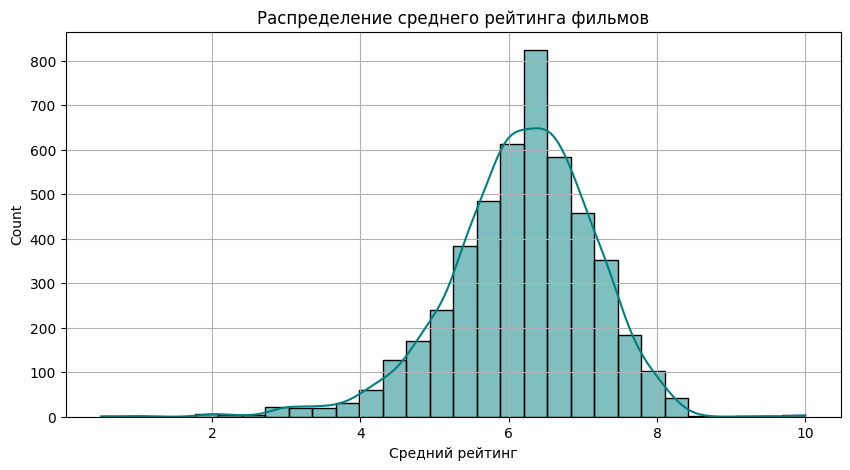

In [348]:


# Vote Average
plt.figure(figsize=(10, 5))
sns.histplot(data[data['vote_average'] > 0]['vote_average'], bins=30, kde=True, color='teal')
plt.title('Распределение среднего рейтинга фильмов')
plt.xlabel('Средний рейтинг')
plt.grid(True)
plt.show()

Распределение среднего рейтенга показывает, что средняя оценка превосходит 5, что говорит о том что люди склонны оценивать фильмы выше среднего.

Проверим как на популрность влияет язык оригинала, для начала составим график распространенности языков

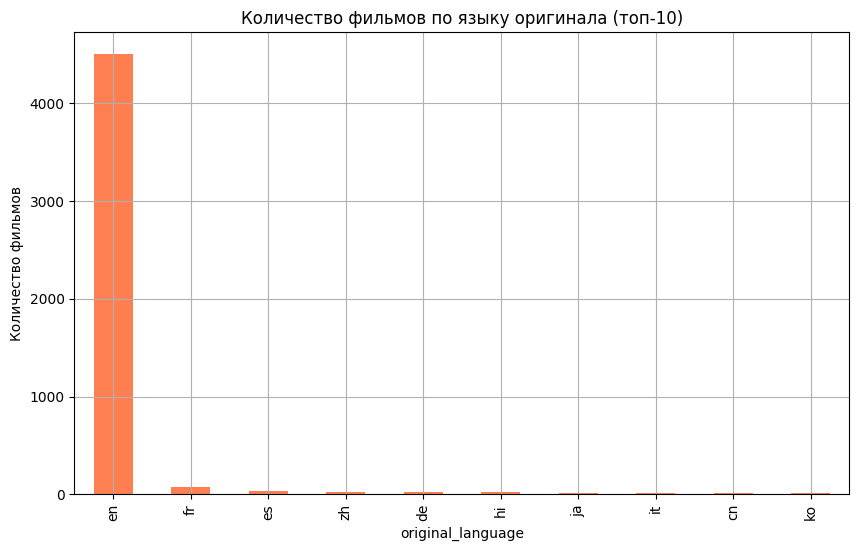

In [349]:
# Топ-10 языков по количеству фильмов
plt.figure(figsize=(10, 6))
data['original_language'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title('Количество фильмов по языку оригинала (топ-10)')
plt.ylabel('Количество фильмов')
plt.grid(True)
plt.show()


Как видно английский с огромным отрывом опережает все остальные языки, поэтому можно изучить как наличие английского языка влияет на популярность фильмом

Количество фильмов по группам:
lang_group
English    4504
Other       298
Name: count, dtype: int64

Средняя популярность по языкам:
lang_group
English    22.182359
Other      11.134820
Name: popularity, dtype: float64

Корреляция между английским языком и популярностью: 0.084


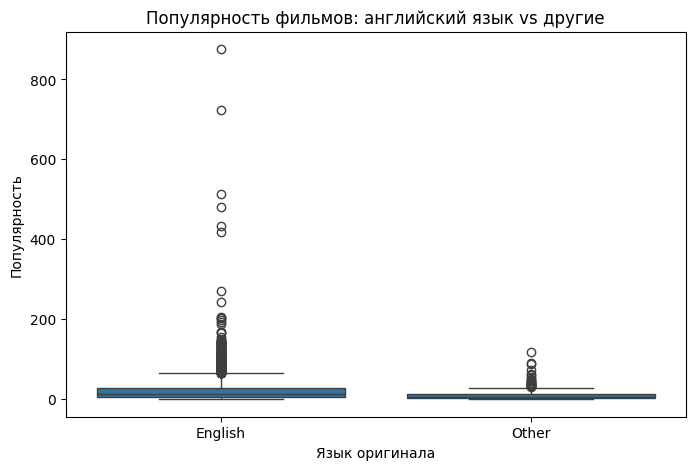

In [350]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Делим на группы: английский и другие
data['lang_group'] = data['original_language'].apply(lambda x: 'English' if x == 'en' else 'Other')

# 2. Считаем количество фильмов в каждой группе
lang_counts = data['lang_group'].value_counts()
print("Количество фильмов по группам:")
print(lang_counts)

# 3. Средняя популярность по группам
mean_popularity = data.groupby('lang_group')['popularity'].mean()
print("\nСредняя популярность по языкам:")
print(mean_popularity)

# 4. Корреляция (временное кодирование для расчёта корреляции)
lang_temp = data['lang_group'].map({'English': 1, 'Other': 0})
corr = lang_temp.corr(data['popularity'])
print(f"\nКорреляция между английским языком и популярностью: {corr:.3f}")

# 5. Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='lang_group', y='popularity', data=data)
plt.title('Популярность фильмов: английский язык vs другие')
plt.xlabel('Язык оригинала')
plt.ylabel('Популярность')
plt.show()

# Удалим временный столбец (если не нужен дальше)
data.drop(columns='lang_group', inplace=True)


Можно заметить, что не анлийских фильмов очень мало, а те что присутствуют в дата сете склоны быть менее популрны

Посмотрим на корреляцию популярности в зависимости от того снимался ли фильм известной компанией или в нём есть известный актер

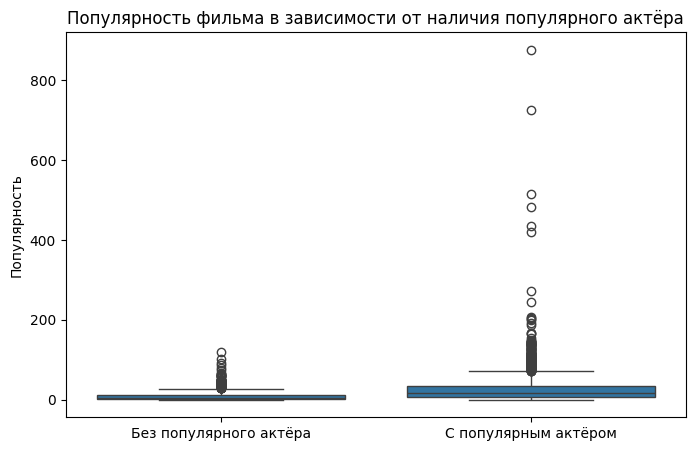

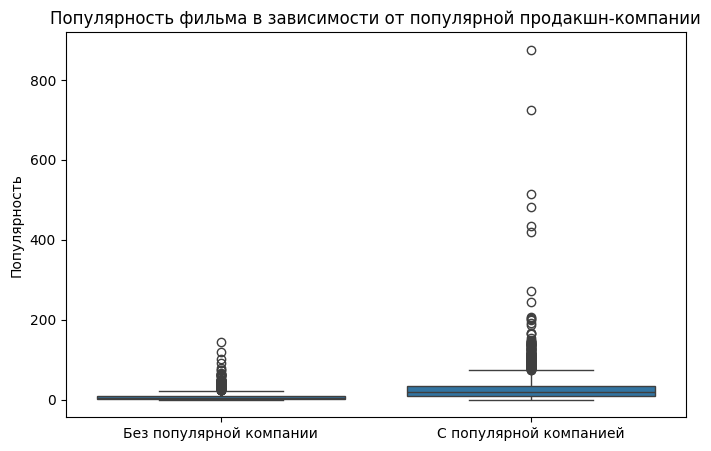

In [351]:
from collections import Counter
def extract_names(text):
    try:
        return [d['name'] for d in ast.literal_eval(text)]
    except:
        return []

# --- Применяем к нужным столбцам ---
data["company_list"] = data["production_companies"].apply(extract_names)
data["cast_list"] = data["cast"].apply(extract_names)

# --- Собираем все имена ---
all_companies = [company for sublist in data["company_list"] for company in sublist]
all_actors = [actor for sublist in data["cast_list"] for actor in sublist]

# --- Считаем частоту появления ---
company_counts = Counter(all_companies)
actor_counts = Counter(all_actors)

# --- Задаём "популярных" по порогу ---
top_companies = set(name for name, count in company_counts.items() if count >= 10)
top_actors = set(name for name, count in actor_counts.items() if count >= 15)

# --- Временные бинарные метки для анализа ---
data["has_popular_actor"] = data["cast_list"].apply(lambda cast: any(actor in top_actors for actor in cast))
data["has_popular_company"] = data["company_list"].apply(lambda companies: any(c in top_companies for c in companies))

# --- Визуализация: наличие популярного актёра vs популярность ---
plt.figure(figsize=(8,5))
sns.boxplot(x="has_popular_actor", y="popularity", data=data)
plt.xticks([0, 1], ['Без популярного актёра', 'С популярным актёром'])
plt.title("Популярность фильма в зависимости от наличия популярного актёра")
plt.xlabel("")
plt.ylabel("Популярность")
plt.show()

# --- Визуализация: наличие популярной компании vs популярность ---
plt.figure(figsize=(8,5))
sns.boxplot(x="has_popular_company", y="popularity", data=data)
plt.xticks([0, 1], ['Без популярной компании', 'С популярной компанией'])
plt.title("Популярность фильма в зависимости от популярной продакшн-компании")
plt.xlabel("")
plt.ylabel("Популярность")
plt.show()


Можно видеть, что все супер хиты были сняты популярными актерами и известной компанией, кроме того среднее популярность у фильмов где есть популярной актери или они сняты популярной компанией тоже выше

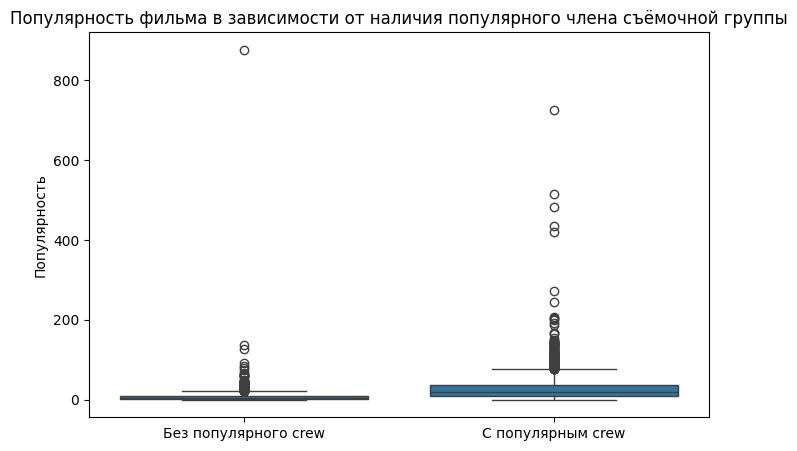

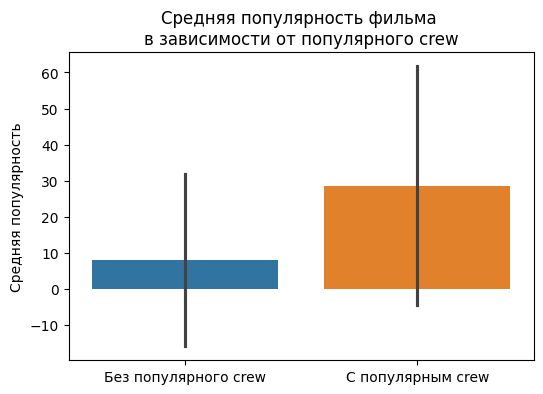

In [352]:

data["crew_list"] = data["crew"].apply(extract_names)

all_crew = [member for sublist in data["crew_list"] for member in sublist]

crew_counts = Counter(all_crew)

top_crew = set(name for name, count in crew_counts.items() if count >= 15)

data["has_popular_crew"] = data["crew_list"].apply(lambda crew: any(member in top_crew for member in crew))

plt.figure(figsize=(8,5))
sns.boxplot(x="has_popular_crew", y="popularity", data=data)
plt.xticks([0, 1], ['Без популярного crew', 'С популярным crew'])
plt.title("Популярность фильма в зависимости от наличия популярного члена съёмочной группы")
plt.xlabel("")
plt.ylabel("Популярность")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(
    x="has_popular_crew",
    y="popularity",
    data=data,
    errorbar='sd',
    hue="has_popular_crew",
    legend=False
)
plt.xticks([0, 1], ['Без популярного crew', 'С популярным crew'])
plt.title("Средняя популярность фильма \nв зависимости от популярного crew")
plt.xlabel("")
plt.ylabel("Средняя популярность")
plt.show()



Посмтрим как изменяеться популярность фильма в зависимсоти от его длительности и изучим признак runtime

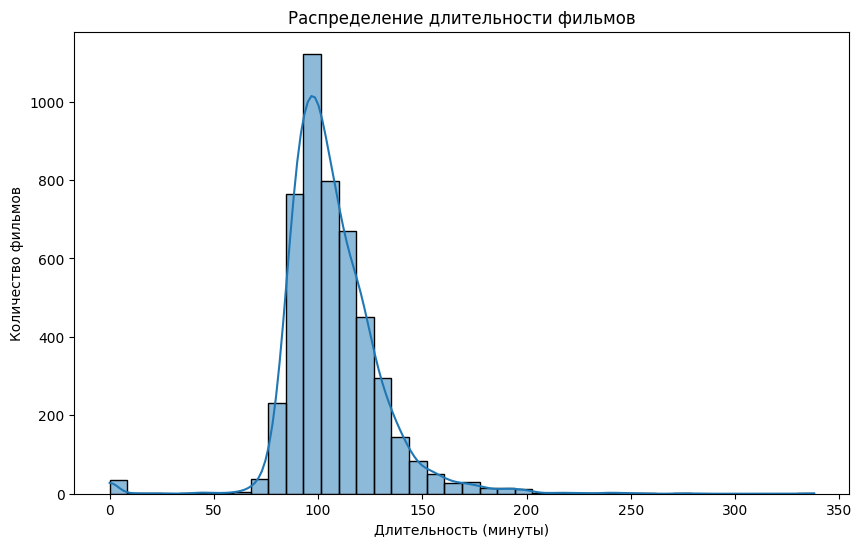

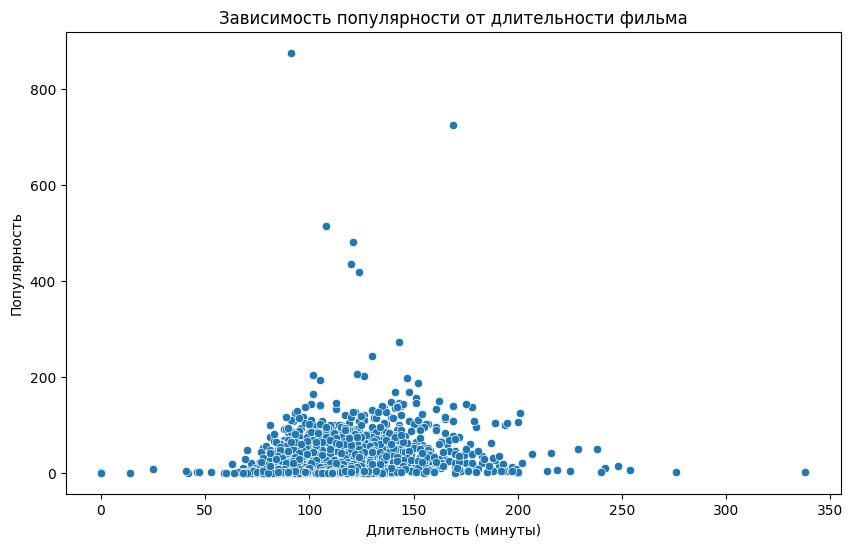

Количество фильмов в каждой категории:
runtime_category
medium    3110
long       988
short      704
Name: count, dtype: int64

Средняя популярность по группам:
runtime_category
long      34.542553
medium    19.498598
short     12.015393
Name: popularity, dtype: float64

Корреляция каждой категории с популярностью:
long      0.208701
medium   -0.085149
short    -0.123520
dtype: float64


In [353]:
plt.figure(figsize=(10,6))
sns.histplot(data['runtime'].dropna(), bins=40, kde=True)
plt.title('Распределение длительности фильмов')
plt.xlabel('Длительность (минуты)')
plt.ylabel('Количество фильмов')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data.dropna(subset=['runtime', 'popularity']),
    x='runtime', y='popularity'
)
plt.title('Зависимость популярности от длительности фильма')
plt.xlabel('Длительность (минуты)')
plt.ylabel('Популярность')
plt.show()

def categorize_runtime(runtime):
    if pd.isna(runtime):
        return
    elif runtime < 90:
        return 'short'
    elif runtime <= 120:
        return 'medium'
    else:
        return 'long'

data['runtime_category'] = data['runtime'].apply(categorize_runtime)

runtime_counts = data['runtime_category'].value_counts()
print("Количество фильмов в каждой категории:")
print(runtime_counts)

popularity_by_group = data.groupby('runtime_category')['popularity'].mean()
print("\nСредняя популярность по группам:")
print(popularity_by_group)

runtime_dummies = pd.get_dummies(data['runtime_category'])
correlations = runtime_dummies.apply(lambda col: data['popularity'].corr(col))

print("\nКорреляция каждой категории с популярностью:")
print(correlations)




На графике runtime мы видем небольшое количество фильмов с длительностью 0, которые говорят о том что для этих фильмов длительность не указана.
Так же заметно что большенство фильмов имееют длительность в диапозоне 90 - 120 минут тоесть попадают в категорию medium. 
По данным можно сделать вывод что более длительные фильмы склоны быть более поулярными

Проверим влияет ли длина названия фильма на его популярность

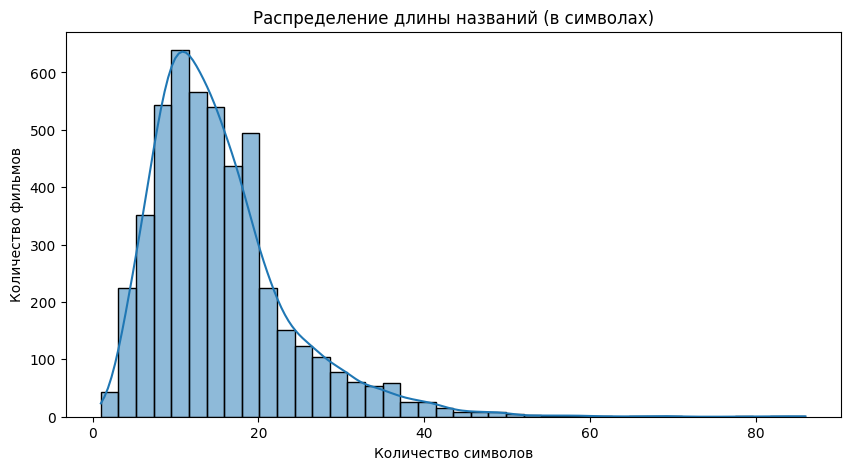

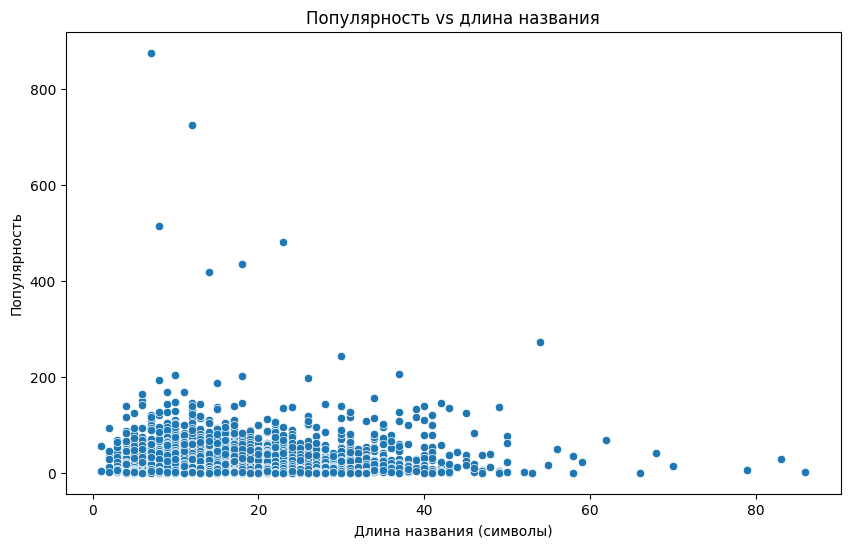

In [354]:
data['title'] = data['title'].astype(str)
data['title_length_chars'] = data['title'].apply(len)
data['title_word_count'] = data['title'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,5))
sns.histplot(data['title_length_chars'], bins=40, kde=True)
plt.title('Распределение длины названий (в символах)')
plt.xlabel('Количество символов')
plt.ylabel('Количество фильмов')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='title_length_chars', y='popularity', data=data)
plt.title('Популярность vs длина названия')
plt.xlabel('Длина названия (символы)')
plt.ylabel('Популярность')
plt.show()

Можно заметить, что большенство фильмов используют не очень большие название до 20 символов, а популярноть почти никак не связанна с длиной названия

Посмотрим на каких языках говорят в фильмах и как это влияет на их популярность

Топ-10 языков:
[('en', 4485), ('fr', 437), ('es', 351), ('de', 262), ('it', 188), ('ru', 185), ('zh', 107), ('ja', 97), ('pt', 68), ('ar', 67)]


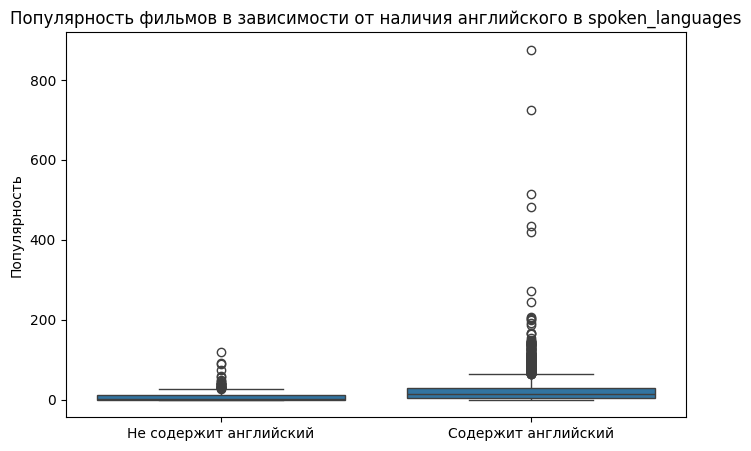

Корреляция между speaks_english и популярностью: 0.107


In [355]:
data['spoken_lang_list'] = data['spoken_languages'].apply(
    lambda x: [d['iso_639_1'] for d in ast.literal_eval(x)] if pd.notnull(x) else [])

all_langs = [lang for sublist in data['spoken_lang_list'] for lang in sublist]
lang_counts = Counter(all_langs)
top_langs = lang_counts.most_common(10)
print("Топ-10 языков:")
print(top_langs)

data['speaks_english'] = data['spoken_lang_list'].apply(lambda langs: 'en' in langs)

plt.figure(figsize=(8,5))
sns.boxplot(x='speaks_english', y='popularity', data=data)
plt.xticks([0, 1], ['Не содержит английский', 'Содержит английский'])
plt.title('Популярность фильмов в зависимости от наличия английского в spoken_languages')
plt.ylabel('Популярность')
plt.xlabel('')
plt.show()

corr = data['speaks_english'].astype(int).corr(data['popularity'])
print(f"Корреляция между speaks_english и популярностью: {corr:.3f}")



Языки которые содержат анлийский в среднем более попуярные, а все хиты которые есть в дата сете на английском

Посмотрим на признак country_list и изучим как производство фильма в разных странная влияет на его популярность

Топ-5 стран: ['United States of America', 'United Kingdom', 'Germany', 'France', 'Canada']


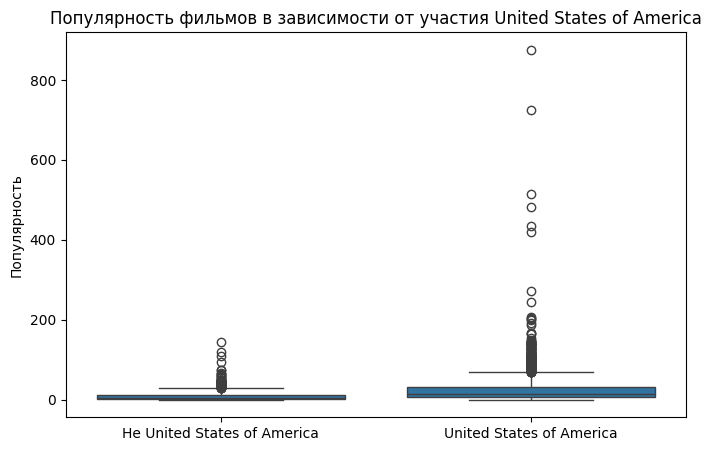

Корреляция между производством в United States of America и популярностью: 0.169


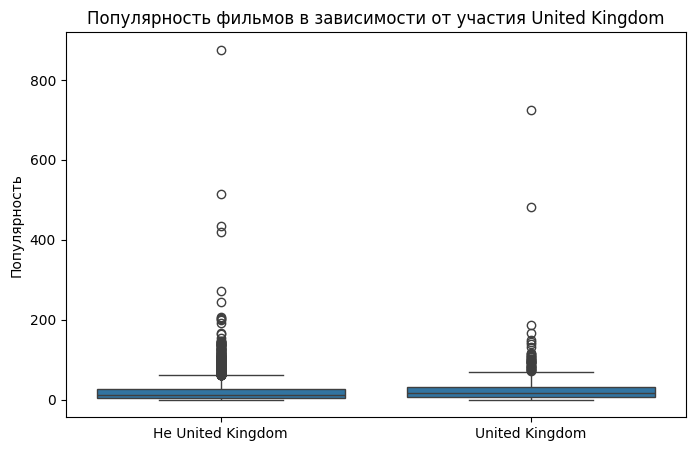

Корреляция между производством в United Kingdom и популярностью: 0.057


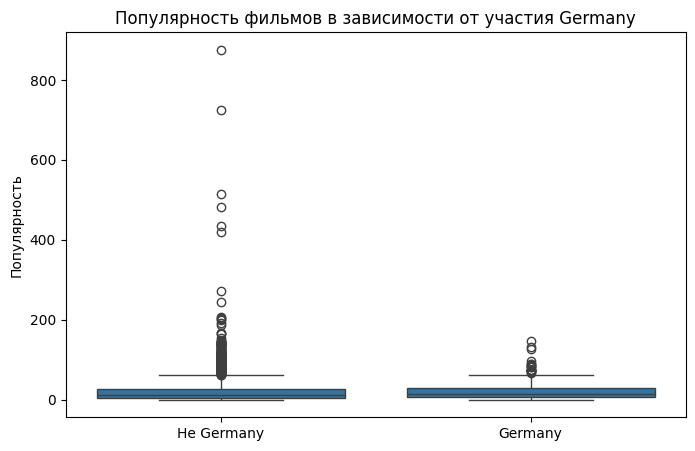

Корреляция между производством в Germany и популярностью: 0.010


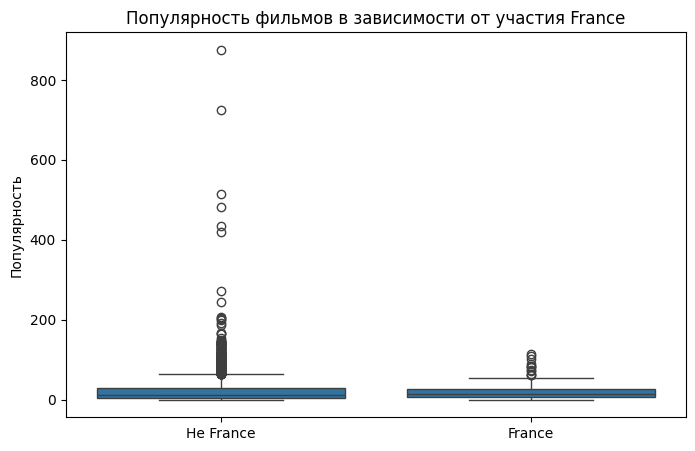

Корреляция между производством в France и популярностью: -0.019


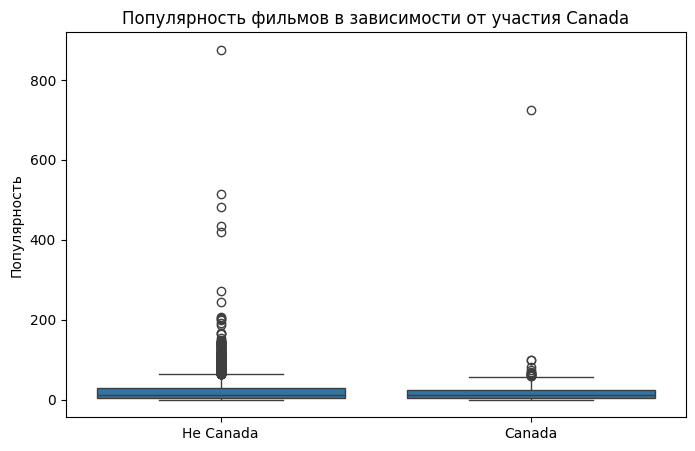

Корреляция между производством в Canada и популярностью: -0.006


In [356]:
data['country_list'] = data['production_countries'].apply(
    lambda x: [d['name'] for d in ast.literal_eval(x)] if pd.notnull(x) else [])


all_countries = [country for sublist in data['country_list'] for country in sublist]
country_counts = Counter(all_countries)
top_countries = [country for country, _ in country_counts.most_common(5)]
print("Топ-5 стран:", top_countries)

for country in top_countries:
    data[f'produced_in_{country}'] = data['country_list'].apply(lambda countries: country in countries)

for country in top_countries:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[f'produced_in_{country}'], y=data['popularity'])
    plt.xticks([0, 1], [f'Не {country}', country])
    plt.title(f'Популярность фильмов в зависимости от участия {country}')
    plt.xlabel('')
    plt.ylabel('Популярность')
    plt.show()
    
    corr = data[f'produced_in_{country}'].astype(int).corr(data['popularity'])
    print(f"Корреляция между производством в {country} и популярностью: {corr:.3f}")


Из полученных данных видно что если фильм сделан в США то он в среднем будет популярнее, что не удивительно учитывая что большая часть известных студий и актеров из америки

Проверим как длина описания влияет на популярность фильма. Может быть более короткие и просые описания будт популярнее, чем длинные

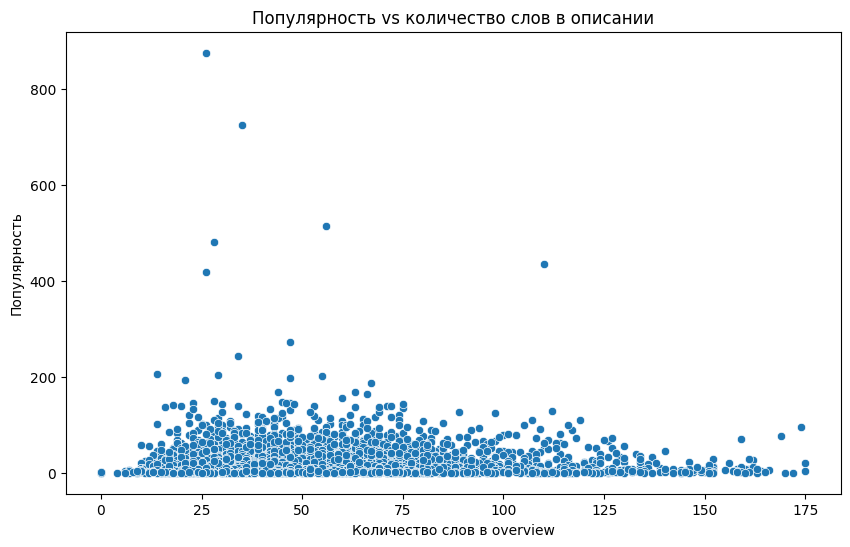

Корреляция с длиной описания (символы): -0.010
Корреляция с длиной описания (слова): -0.011


In [357]:
data['overview'] = data['overview'].fillna('').astype(str)
data['overview_char_len'] = data['overview'].apply(len)
data['overview_word_count'] = data['overview'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,6))
sns.scatterplot(x='overview_word_count', y='popularity', data=data)
plt.title('Популярность vs количество слов в описании')
plt.xlabel('Количество слов в overview')
plt.ylabel('Популярность')
plt.show()

corr_chars = data['overview_char_len'].corr(data['popularity'])
corr_words = data['overview_word_count'].corr(data['popularity'])
print(f"Корреляция с длиной описания (символы): {corr_chars:.3f}")
print(f"Корреляция с длиной описания (слова): {corr_words:.3f}")


Как видно кореляция между длиной описания и популярнстью фильма отрицательна и очень мала

Посмотрим как наличие и длина слогана(tagline) скажуться на популярности

In [358]:

data['has_tagline'] = data['tagline'].apply(lambda x: int(str(x).strip() != ''))

tagline_counts = data['has_tagline'].value_counts()
print("Количество фильмов со слоганом и без:")
print(tagline_counts)

popularity_by_tagline = data.groupby('has_tagline')['popularity'].mean()

print("\nСредняя популярность:")
print("Фильмы без слогана:", popularity_by_tagline[0])
print("Фильмы со слоганом:", popularity_by_tagline[1])

data['tagline_length'] = data['tagline'].apply(lambda x: len(str(x).strip()))

correlation = data[['tagline_length', 'popularity']].corr().loc['tagline_length', 'popularity']

print("\nКорреляция длины слогана с популярностью:", correlation)


Количество фильмов со слоганом и без:
has_tagline
1    3959
0     843
Name: count, dtype: int64

Средняя популярность:
Фильмы без слогана: 6.495045505338078
Фильмы со слоганом: 24.691133206365244

Корреляция длины слогана с популярностью: 0.056426849501077646


Рассмотрим как ключевые слова влияют на популярность. Посмотрем сначала на то как количество ключевых слов корелируют с популярностью, а потом выберем топ 20 самых популярных ключевых слов

 Корреляция между числом keyword'ов и популярностью:
0.29539621614939615

 Корреляция между числом top-20 keyword'ов и популярностью:
0.1554533205228745

 Средняя популярность для фильмов с хотя бы одним топ-20 keyword:
has_top_keyword
0    18.179926
1    25.577750
Name: popularity, dtype: float64


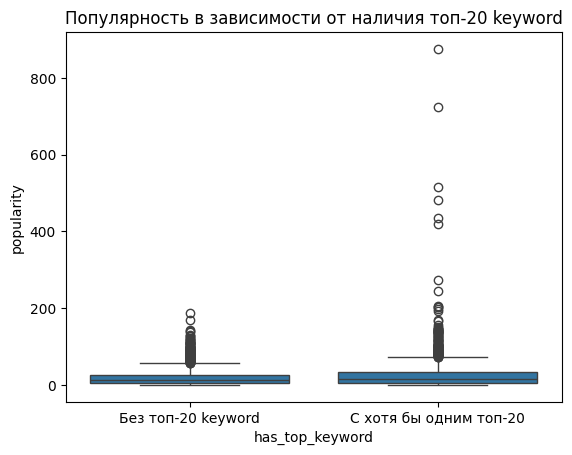

Фильмы с хотя бы одним топ-20 keyword: 2153
Фильмы без ни одного топ-20 keyword: 2649


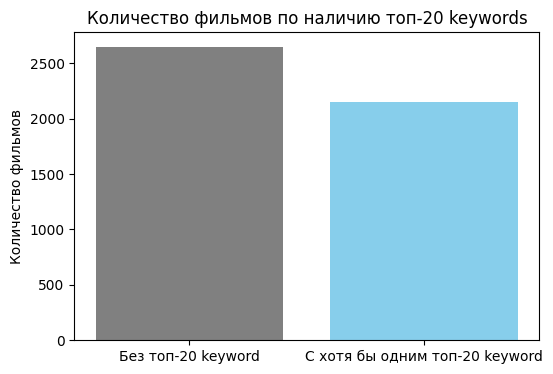

In [359]:
def extract_keywords(x):
    try:
        parsed = ast.literal_eval(x)
        return [d['name'] for d in parsed if 'name' in d]
    except:
        return []

data['keyword_list'] = data['keywords'].apply(extract_keywords)
data['keyword_count'] = data['keyword_list'].apply(len)

all_keywords = [kw for sublist in data['keyword_list'] for kw in sublist]
top_20_keywords = [kw for kw, _ in Counter(all_keywords).most_common(20)]
def count_top_keywords(kw_list):
    return sum(1 for kw in kw_list if kw in top_20_keywords)

data['top_keyword_count'] = data['keyword_list'].apply(count_top_keywords)
data['has_top_keyword'] = data['top_keyword_count'].apply(lambda x: int(x > 0))

print(" Корреляция между числом keyword'ов и популярностью:")
print(data['keyword_count'].corr(data['popularity']))

print("\n Корреляция между числом top-20 keyword'ов и популярностью:")
print(data['top_keyword_count'].corr(data['popularity']))

print("\n Средняя популярность для фильмов с хотя бы одним топ-20 keyword:")
print(data.groupby('has_top_keyword')['popularity'].mean())

sns.boxplot(x=data['has_top_keyword'], y=data['popularity'])
plt.xticks([0, 1], ['Без топ-20 keyword', 'С хотя бы одним топ-20'])
plt.title("Популярность в зависимости от наличия топ-20 keyword")
plt.show()

counts = data['has_top_keyword'].value_counts().sort_index()

print(f"Фильмы с хотя бы одним топ-20 keyword: {counts.get(1, 0)}")
print(f"Фильмы без ни одного топ-20 keyword: {counts.get(0, 0)}")
import matplotlib.pyplot as plt

labels = ['Без топ-20 keyword', 'С хотя бы одним топ-20 keyword']
values = [counts.get(0, 0), counts.get(1, 0)]

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['gray', 'skyblue'])
plt.title('Количество фильмов по наличию топ-20 keywords')
plt.ylabel('Количество фильмов')
plt.show()



Мы видим что количество ключевых слов и наличие популярного напрямую корелируют с популярностью

Посмотрим как распределенно relese_date и как оно влияет на популярность

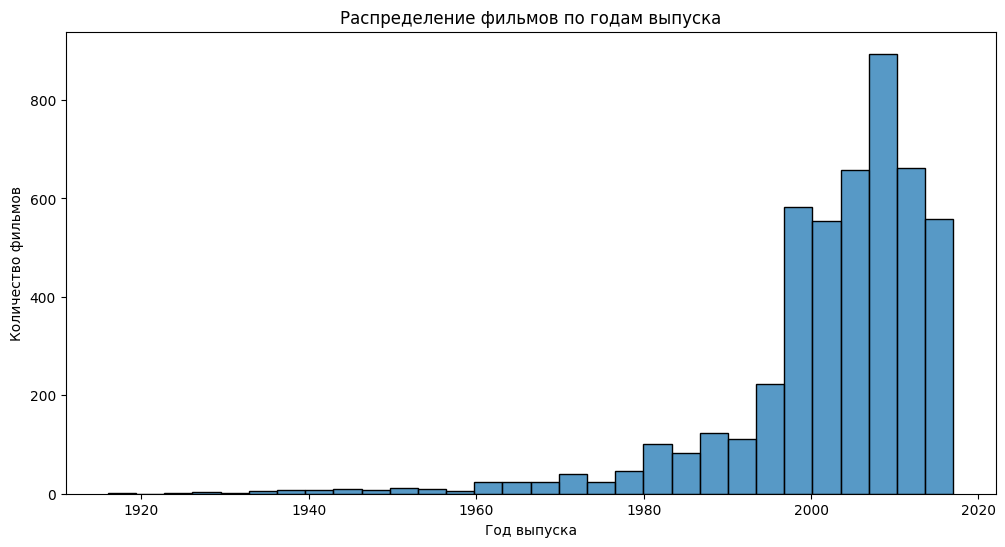

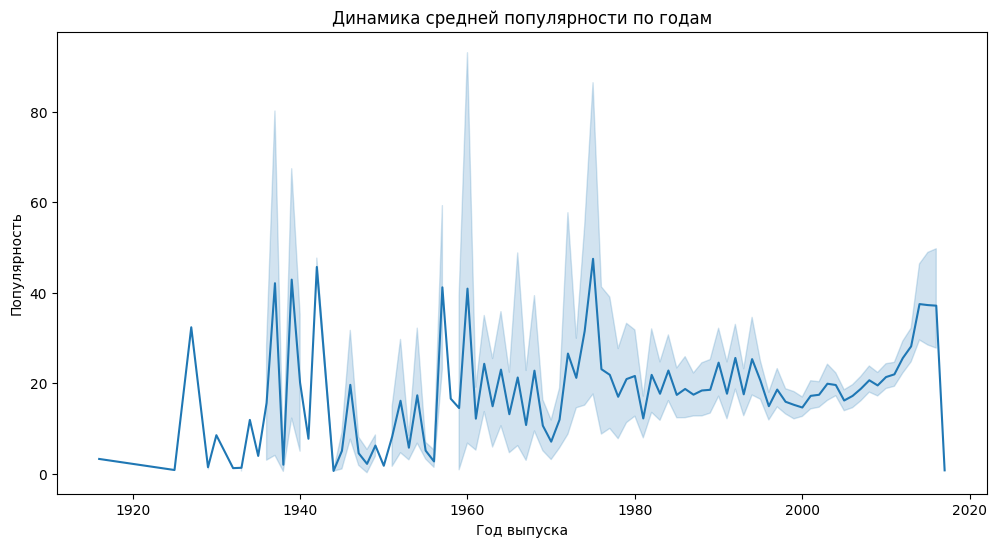

In [360]:
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data['release_year'] = data['release_date'].dt.year

plt.figure(figsize=(12,6))
sns.histplot(data['release_year'].dropna(), bins=30, kde=False)
plt.title("Распределение фильмов по годам выпуска")
plt.xlabel("Год выпуска")
plt.ylabel("Количество фильмов")
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(x='release_year', y='popularity', data=data)
plt.title("Динамика средней популярности по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Популярность")
plt.show()


# Вывод по EDA

* В дата сете большое число признаков, которые не релеванты из - за того что имееют уникльные значения, но на основе их можно создать более подходящие признаки

* У многих признаков есть большое количество пустых или незначаших значей как у числовых признаков, так и категориальных

* Большенство фильмов не популярны, так же есть несколько супер хитов. Средняя популярность 21.5, а максимальная 875.5.

* Самые распространенные жанры Drama, Comedy, Thriller

* Самая большая кореляция с популярностью у Adventure и Action

* Посмыслу задачи нам не подходят признаки vote_count, revenue, vote_average

* 99% процентов фильмов имееют статус relesed, поэтому признак status_encoded нерепрезентативный

* Большенство фильмов имееют низкий бюджет, так же бюджет имеет подъемы поулярности на круглых значениях тоесть на (1.5 млн, 2 млн, 2.5 млн)

* Средний рейтинг фильмов примерно 6.1

* Большенство фильмов сняты на английском или имеют английский перевод, не английские фильмы обычно менее популярны

* Известные компании и актеры увеличивают увеличивают популярность фильма

* США выпускает наиболее популярные фильмы

* Большенство фильмов обладаюет длинной от 90 до 120 минут. Длинные фильмы в среднем более популярные

* Длина названия или его описания почти не влияет на популярность фильма

* Чем больше ключевых слов у фильма, чем он обычно популярнее, так же наличие наиболее распространные ключевых слов, дает положительную кореляцию с популярностью

# Создание новых признаков

Для начала создадим новый чистый датасет

In [361]:
data_clean = pd.DataFrame()
data_clean['target'] = data['popularity']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 67 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   budget                                4802 non-null   int64         
 1   genres                                4802 non-null   object        
 2   keywords                              4802 non-null   object        
 3   original_language                     4802 non-null   object        
 4   original_title                        4802 non-null   object        
 5   overview                              4802 non-null   object        
 6   popularity                            4802 non-null   float64       
 7   production_companies                  4802 non-null   object        
 8   production_countries                  4802 non-null   object        
 9   release_date                          4802 non-null   datetime64[ns]
 10  

Из выводов сделанных выше мы имеем довольно много новых признаков которые могут помочь с задачей.

Первый это orginal_is_english в котором будет два значение 1 и 0 будет показывать язык фильма английский или любой другой

In [362]:
data_clean['orginal_is_english'] = data['original_language'].apply(lambda x: 1 if x == 'en' else 0)

Еще два новых признака это data has_popular_actor has_popular_company и has_popular_crew. Они отображают снимался ли фильм известной студией и есть ли среди ролей топовый актер

In [363]:
data_clean["has_popular_actor"] = data["cast_list"].apply(lambda cast: any(actor in top_actors for actor in cast))
data_clean["has_popular_company"] = data["company_list"].apply(lambda companies: any(c in top_companies for c in companies))
data_clean["has_popular_crew"] = data["crew_list"].apply(lambda crew: any(member in top_crew for member in crew))

Так же добавим признак has_english, который показыет есть ли у фильма анлийская озвучка

In [364]:
data_clean['has_english'] = data['spoken_lang_list'].apply(lambda langs: 'en' in langs)

Пятым и шестым новым признаком будет title_lenght и overview_length

In [365]:
data_clean['title_length'] = data['title'].apply(len)
data_clean['overview_length'] = data['overview'].apply(len)

На основе признака production_countries добавим признак is_usa который будет показывать производился ли фильм в америке

In [366]:
data_clean['is_usa'] = data['production_countries'].apply(
    lambda x: 'US' in [d['iso_3166_1'] for d in ast.literal_eval(x)] if pd.notnull(x) and x != '[]' else False
)


Создадим признак budget_per_runtime, который будет показывать бюджет на минуту хронометража. Для начала надо убедиться что у runtime нет 0 значений

In [367]:
runtime_median = data.loc[data['runtime'] > 0, 'runtime'].median()

data['runtime'] = data['runtime'].apply(lambda x: runtime_median if x == 0 else x)

print("Количество нулевых runtime после замены:", (data['runtime'] == 0).sum())


Количество нулевых runtime после замены: 0


In [368]:
data_clean['budget_per_runtime'] = data['budget'] / data['runtime']


Добавим признак has_tagline

In [369]:
data_clean["has_tagline"] = data['tagline'].apply(lambda x: int(str(x).strip() != ''))

Создадим признак relese_year

In [370]:
data_clean["relese_year"] = data['release_date'].dt.year

Последними двумя признаками которые мы добавим будут has_top_keyword keyword_count

In [371]:
data['keyword_list'] = data['keywords'].apply(extract_keywords)
data_clean['keyword_count'] = data['keyword_list'].apply(len)
data_clean['has_top_keyword'] = data['top_keyword_count'].apply(lambda x: int(x > 0))

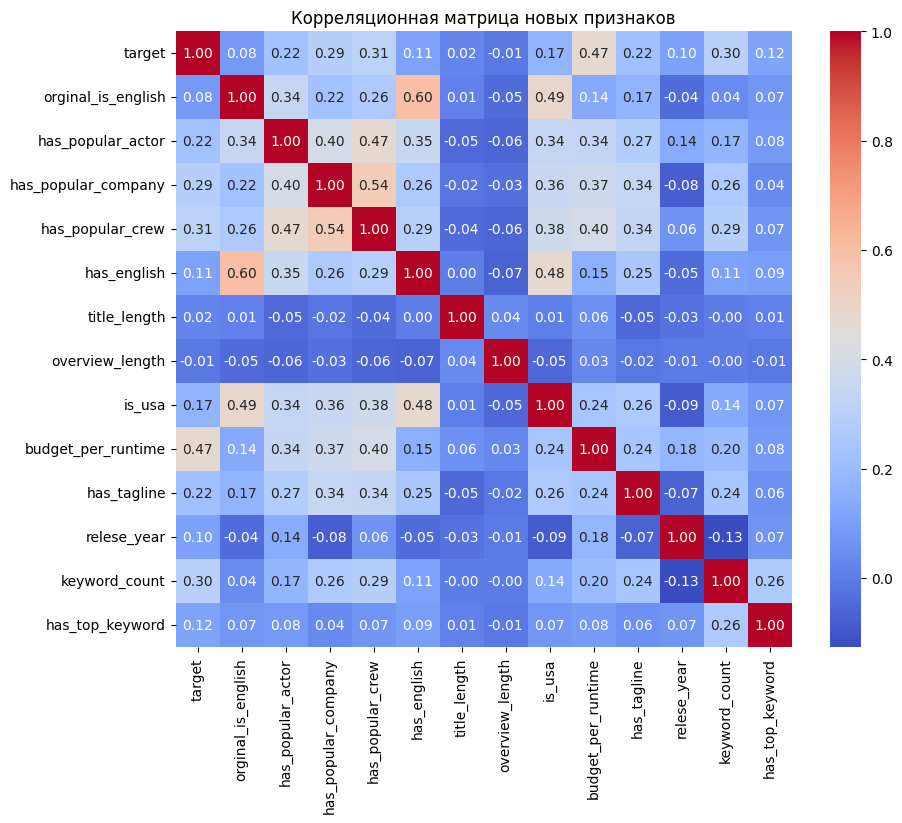

In [372]:
corr_matrix = data_clean.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Корреляционная матрица новых признаков")
plt.show()

In [373]:
corr_matrix['target'].sort_values(ascending=False)

target                 1.000000
budget_per_runtime     0.472262
has_popular_crew       0.308884
keyword_count          0.295396
has_popular_company    0.287285
has_popular_actor      0.223997
has_tagline            0.217585
is_usa                 0.169125
has_top_keyword        0.115641
has_english            0.107370
relese_year            0.101998
orginal_is_english     0.083775
title_length           0.024459
overview_length       -0.010003
Name: target, dtype: float64

# Подбор и подготовка признаков
Выберем признакои которые будем использовать в модели подготовим их, создадим новые, а так же удалим ненужные
## Подготовка дата сета
После изучение дата сета мы увидели что в нем есть ряд проблемм которые необходимо исправить для корректной работы. 
Пройдемся еще раз по каждному признаку из оригинального дата сета добавим в новый нужные и удалим те, что не несут полезной информации

Budget это отличный признак с высокой кореляцией с тагргетом, но в дата сете есть досаточно много фильмов с незивестным бюджетом. Для решение этой проблемы добавим бинарный признак has_budget

In [374]:
data_clean['has_budget'] = (data['budget'] > 0).astype(int)

def replace_budget_with_year_median(row, year_medians):
    if row['budget'] == 0:
        return year_medians.get(row['release_date'], global_median)
    else:
        return row['budget']

year_medians = data[data['budget'] > 0].groupby('release_date')['budget'].median().to_dict()

global_median = data[data['budget'] > 0]['budget'].median()

data_clean['budget'] = data.apply(lambda row: replace_budget_with_year_median(row, year_medians), axis=1)


Geners используем тот же подход что и для eda MultiLabelBinarizer, если списко жанров пустой у нас получиться просто 0 во всех жанров, что никак негативно не скажеться на модели

In [375]:
data_clean = pd.concat([data_clean, genres_encoded], axis=1)

homepage - как и было сказано ненужнй признак для нашей задачи

keywords - мы уже доставли полезные признаки, сырой keywords нам не нужен

overview, title, original_title и tagline не нужны так как там только уникальные значения

original_language - нам больше не нужен так как мы используем признак orginal_is_english

spoken_languages - сырой нам не нужен испльзуюм has_english вместо него

production_companies production_countries, cast и cast не нужны нам в сыром виде

revenue, vote_average, vote_count - неподходят по смыслу задачи

relese_date - мы уже создали признак relese_year

Runtime - подходящий нам признак имеет небольшую корляцию с таргетом

In [376]:
data_clean["runtime"] = data["runtime"]

status - 99% процентов значений это relesed не информативно

Посмотрим на итоговый лист признаков

In [377]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   target               4802 non-null   float64
 1   orginal_is_english   4802 non-null   int64  
 2   has_popular_actor    4802 non-null   bool   
 3   has_popular_company  4802 non-null   bool   
 4   has_popular_crew     4802 non-null   bool   
 5   has_english          4802 non-null   bool   
 6   title_length         4802 non-null   int64  
 7   overview_length      4802 non-null   int64  
 8   is_usa               4802 non-null   bool   
 9   budget_per_runtime   4802 non-null   float64
 10  has_tagline          4802 non-null   int64  
 11  relese_year          4802 non-null   int32  
 12  keyword_count        4802 non-null   int64  
 13  has_top_keyword      4802 non-null   int64  
 14  has_budget           4802 non-null   int64  
 15  budget               4802 non-null   f

# Обучение на простой модели

In [378]:
data_clean.head()

,target,orginal_is_english,has_popular_actor,has_popular_company,has_popular_crew,has_english,title_length,overview_length,is_usa,budget_per_runtime,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,runtime
0,150.437577,1,True,True,True,True,6,175,True,1.462963e+06,...,0,0,0,0,1,0,0,0,0,162.0
1,139.082615,1,True,True,True,True,40,176,True,1.775148e+06,...,0,0,0,0,0,0,0,0,0,169.0
2,107.376788,1,True,True,True,True,7,240,True,1.655405e+06,...,0,0,0,0,0,0,0,0,0,148.0
3,112.312950,1,True,True,True,True,21,428,True,1.515152e+06,...,0,0,0,0,0,0,1,0,0,165.0
4,43.926995,1,True,True,True,True,11,342,True,1.969697e+06,...,0,0,0,0,1,0,0,0,0,132.0


In [379]:
from sklearn.preprocessing import MinMaxScaler

features_to_scale = data_clean.drop(columns=['target']).columns
scaler = MinMaxScaler()
data_clean[features_to_scale] = scaler.fit_transform(data_clean[features_to_scale])


In [380]:
data_clean.head()

,target,orginal_is_english,has_popular_actor,has_popular_company,has_popular_crew,has_english,title_length,overview_length,is_usa,budget_per_runtime,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,runtime
0,150.437577,1.0,1.0,1.0,1.0,1.0,0.058824,0.175,1.0,0.523587,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.456790
1,139.082615,1.0,1.0,1.0,1.0,1.0,0.458824,0.176,1.0,0.635316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.478395
2,107.376788,1.0,1.0,1.0,1.0,1.0,0.070588,0.240,1.0,0.592461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.413580
3,112.312950,1.0,1.0,1.0,1.0,1.0,0.235294,0.428,1.0,0.542265,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.466049
4,43.926995,1.0,1.0,1.0,1.0,1.0,0.117647,0.342,1.0,0.704944,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.364198


In [381]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data_clean.drop(columns=['target'])
y = data_clean['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1], )),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss = model.evaluate(x_test, y_test)
print(f'Loss: {loss}')


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1363.9071 - val_loss: 570.4508
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 535.9864 - val_loss: 473.0482
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 872.4534 - val_loss: 468.5976
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 544.5550 - val_loss: 449.1602
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 581.4141 - val_loss: 448.3954
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 793.6482 - val_loss: 440.8130
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 898.2548 - val_loss: 438.2370
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 828.3947 - val_loss: 435.4421
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 738.4728 - val_loss: 438.5598
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 843.1658 - val_loss: 441.8882
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 539.8657 
Loss: 790.5468139648438


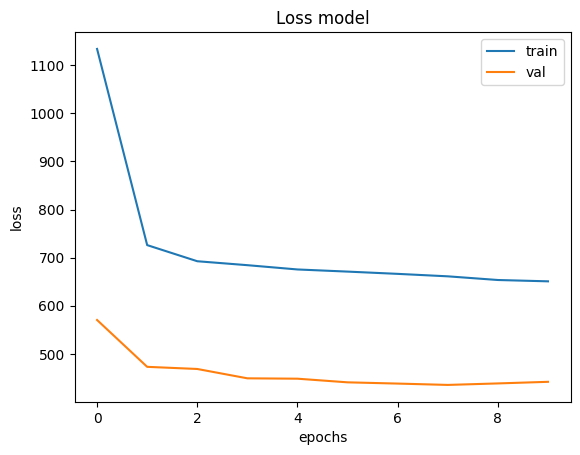

In [382]:
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])
plt.title('Loss model')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [383]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(x_test).flatten()

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Метрики модели таргета:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Метрики модели таргета:
MSE: 790.5468
RMSE: 28.1167
MAE: 11.7275
R^2: 0.3598


Как можно увидеть значения ошибок получились относительно большими, что говорит о том, что модель требует улучшения.

Теперь проведем **feature importance**, чтобы выявить, что больше всего влияет на loss. Сделаем это при помощи Permutation Importance (он измеряет влияние каждого признака на качество модели путем случайной перестановки значений этого признака в данных).

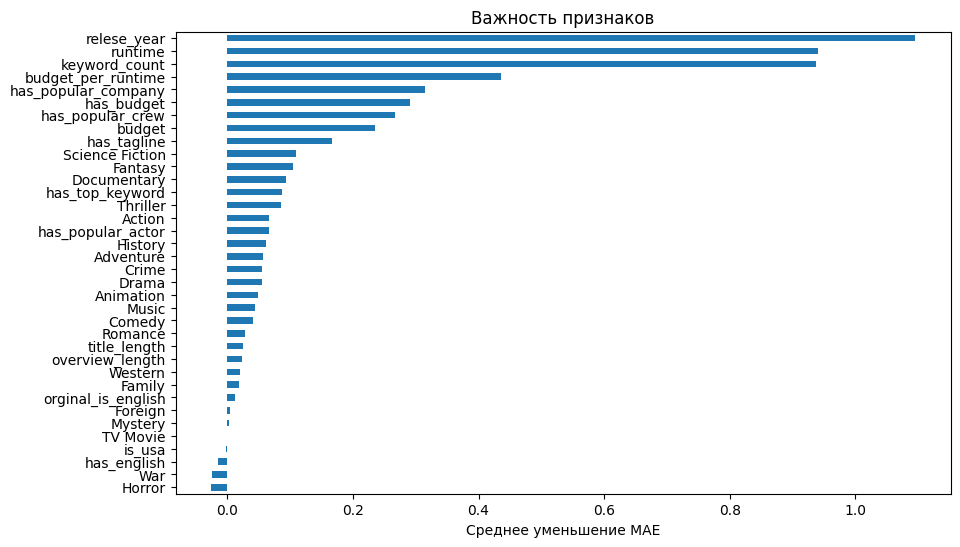

In [384]:
from sklearn.inspection import permutation_importance
from contextlib import redirect_stdout
import io


with redirect_stdout(io.StringIO()):
    res = permutation_importance(model, x_test, y_test, n_repeats=10, scoring='neg_mean_absolute_error')


importances = pd.Series(res.importances_mean, index = X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Из графика можно сделать следующие выводы:

* relese_year больше всех влияет на среднее уменьшение MAE

* Очень хорошо показали себя признаки runtime, keyword_count, has_budget

* Средние показателели у has_popular_crew, budget, has_popular_company, has_tagline

* Жанровые признаки показали себе разным образом некоторые Fantasy, Documentary, Sience Fiction имеют не очень большие показатели, отсальные признаки имееют либо еще меньшие либо вообще отрицательные

* Самые отрицательные признаки это is_usa, has_popular_actor, has_english

Общий вывод таков что не все признаки явлеются важными, а так же имееться целый ряд отрицательных признаков

# Эксперементы с моделями

Сначала удалим не самые нужные принаки. И снова разделим выборку на две части: обучающую и тестовую.

In [385]:

data_exp = data_clean.drop(['is_usa','has_popular_actor','has_english','has_top_keyword','War','Horror'],axis=1)
print(data_exp.head())
X = data_exp.drop(columns=['target'])
Y = data_exp['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

       target  orginal_is_english  has_popular_company  has_popular_crew  \
0  150.437577                 1.0                  1.0               1.0   
1  139.082615                 1.0                  1.0               1.0   
2  107.376788                 1.0                  1.0               1.0   
3  112.312950                 1.0                  1.0               1.0   
4   43.926995                 1.0                  1.0               1.0   

   title_length  overview_length  budget_per_runtime  has_tagline  \
0      0.058824            0.175            0.523587          1.0   
1      0.458824            0.176            0.635316          1.0   
2      0.070588            0.240            0.592461          1.0   
3      0.235294            0.428            0.542265          1.0   
4      0.117647            0.342            0.704944          1.0   

   relese_year  keyword_count  ...  Foreign  History  Music  Mystery  Romance  \
0     0.920792       0.216495  ...      0.0    

В качестве моделей будем использовать:


*   LinearRegression (Ridge)
*   RandomForestRegressor
*   GradientBoostingRegressor
*   Нейронную сеть

Начнем с **LinearRegression**. Используем кросс-валидацию с 5 фолдами. Пока что запустим голую модель, гиперпараметры подберем потом.

In [386]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

cv_mae_scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring=mae_scorer)
cv_mse_scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring=mse_scorer)
cv_r2_scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring=r2_scorer)

mean_mae = -cv_mae_scores.mean()
std_mae = cv_mae_scores.std()
lr_mae = -cv_mae_scores.mean()

lr_mean_mse = -cv_mse_scores.mean()
std_mse = cv_mse_scores.std()

lr_mean_rmse = np.sqrt(-cv_mse_scores.mean())
std_rmse = np.sqrt(cv_mse_scores.std())

lr_mean_r2 = cv_r2_scores.mean()
std_r2 = cv_r2_scores.std()

print(f"Средняя MAE: {lr_mae:.4f}, Стандартное отклонение MAE: {std_mae:.4f}")
print(f"Средняя MSE: {lr_mean_mse:.4f}, Стандартное отклонение MSE: {std_mse:.4f}")
print(f"Средняя RMSE: {lr_mean_rmse:.4f}, Стандартное отклонение RMSE: {std_rmse:.4f}")
print(f"Средний R^2: {lr_mean_r2:.4f}, Стандартное отклонение R^2: {std_r2:.4f}")

Средняя MAE: 12.4005, Стандартное отклонение MAE: 0.7621
Средняя MSE: 670.4534, Стандартное отклонение MSE: 439.9649
Средняя RMSE: 25.8931, Стандартное отклонение RMSE: 20.9753
Средний R^2: 0.3325, Стандартное отклонение R^2: 0.0725


Модель показало умеренные значение R2, но высокие ошибки MAE и RMSE говорят что есть потенциал для улучшения

Попробуем подобрать гиперпареметры с помощью optuna

Подбираем гиперпараметры. Так как у LinearRegression нет гиперпарметров, будем использовать Ridge. Подбор будем делать по уменьшению MAE.

In [387]:
import optuna
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

def objective(trial):
    alpha = trial.suggest_float("alpha", 1e-3, 1.0, log=True)
    fit_intercept = trial.suggest_categorical("fit_intercept", [True, False])

    model = Ridge(alpha=alpha, fit_intercept=fit_intercept, max_iter=1000)

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mae_scores = -cross_val_score(
        model, X_train_scaled, Y_train, cv=kf, scoring="neg_mean_absolute_error"
    )

    return mae_scores.mean()

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

print("Лучшие гиперпараметры:", study.best_params)
print("Минимальная MAE:", study.best_value)

[I 2025-07-07 10:32:14,605] A new study created in memory with name: no-name-9fd26e27-ca0d-4d8d-8d63-c323c9a49a8d
[I 2025-07-07 10:32:14,622] Trial 0 finished with value: 12.400434865028187 and parameters: {'alpha': 0.0682897458361328, 'fit_intercept': True}. Best is trial 0 with value: 12.400434865028187.
[I 2025-07-07 10:32:14,638] Trial 1 finished with value: 22.3914946177578 and parameters: {'alpha': 0.0012078694444997277, 'fit_intercept': False}. Best is trial 0 with value: 12.400434865028187.
[I 2025-07-07 10:32:14,640] Trial 2 finished with value: 22.391494353191863 and parameters: {'alpha': 0.0017430647851612625, 'fit_intercept': False}. Best is trial 0 with value: 12.400434865028187.
[I 2025-07-07 10:32:14,655] Trial 3 finished with value: 22.391493141977165 and parameters: {'alpha': 0.004193259414415374, 'fit_intercept': False}. Best is trial 0 with value: 12.400434865028187.
[I 2025-07-07 10:32:14,671] Trial 4 finished with value: 12.400463412775835 and parameters: {'alpha':

Лучшие гиперпараметры: {'alpha': 0.9000819150859661, 'fit_intercept': True}
Минимальная MAE: 12.400058968231082


Значение MAE, почти не изменились. Попробуем увеличить количество и диапозон гиперпараметров

In [388]:
import optuna
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

def objective(trial):
    alpha = trial.suggest_float("alpha", 1e-5, 10.0, log=True)
    fit_intercept = trial.suggest_categorical("fit_intercept", [True, False])
    solver = trial.suggest_categorical("solver", ["auto", "lsqr", "sparse_cg", "sag", "saga"])

    model = Ridge(alpha=alpha, fit_intercept=fit_intercept, solver=solver, max_iter=5000)

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mae_scores = -cross_val_score(
        model, X_train_scaled, Y_train, cv=kf, scoring="neg_mean_absolute_error"
    )

    return mae_scores.mean()

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Лучшие гиперпараметры:", study.best_params)
print("Минимальная MAE:", study.best_value)

[I 2025-07-07 10:32:14,989] A new study created in memory with name: no-name-d326a7be-9cd6-40a0-8474-dbef1fbed316
[I 2025-07-07 10:32:15,013] Trial 0 finished with value: 12.400641593288135 and parameters: {'alpha': 2.8228081968556462e-05, 'fit_intercept': True, 'solver': 'lsqr'}. Best is trial 0 with value: 12.400641593288135.
[I 2025-07-07 10:32:15,185] Trial 1 finished with value: 12.400491283055405 and parameters: {'alpha': 0.0002565878088463195, 'fit_intercept': True, 'solver': 'sag'}. Best is trial 1 with value: 12.400491283055405.
[I 2025-07-07 10:32:15,352] Trial 2 finished with value: 12.399894769421314 and parameters: {'alpha': 1.2300829620639313, 'fit_intercept': True, 'solver': 'saga'}. Best is trial 2 with value: 12.399894769421314.
[I 2025-07-07 10:32:15,367] Trial 3 finished with value: 22.391463560796257 and parameters: {'alpha': 0.1197704999649914, 'fit_intercept': False, 'solver': 'lsqr'}. Best is trial 2 with value: 12.399894769421314.
[I 2025-07-07 10:32:15,398] Tri

Лучшие гиперпараметры: {'alpha': 9.99602106469786, 'fit_intercept': True, 'solver': 'auto'}
Минимальная MAE: 12.395974600135425


Подбор значений гиперпараметров почти не повлиял на значение MAE, поэтому нет необходимости проверять модель с гиперпаметрами. Тем неменее результат R2=0.33 не самый плохой, а выскокие значение ошибок могут быть связанна с недостаточной информативности признаков.

Теперь попробуем использовать модель **RandomForestRegressor**

In [389]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

mae_scores = -cross_val_score(rf_model, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(rf_model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(mse_scores)
r2_scores = cross_val_score(rf_model, X_train, Y_train, cv=5, scoring='r2')

rf_mae = mae_scores.mean()
rf_mse = mse_scores.mean()
rf_rmse = rmse_scores.mean()
rf_r2 = r2_scores.mean()

print(f"Средняя MAE на 5 фолдах: {rf_mae:.4f}")
print(f"Средняя MSE на 5 фолдах: {rf_mse:.4f}")
print(f"Средняя RMSE на 5 фолдах: {rf_rmse:.4f}")
print(f"Средний R2 на 5 фолдах: {rf_r2:.4f}")
print(f"Стандартное отклонение MAE: {mae_scores.std():.4f}")
print(f"Стандартное отклонение MSE: {mse_scores.std():.4f}")
print(f"Стандартное отклонение RMSE: {rmse_scores.std():.4f}")
print(f"Стандартное отклонение R2: {r2_scores.std():.4f}")

Средняя MAE на 5 фолдах: 11.2748
Средняя MSE на 5 фолдах: 614.5510
Средняя RMSE на 5 фолдах: 24.0875
Средний R2 на 5 фолдах: 0.3812
Стандартное отклонение MAE: 0.4658
Стандартное отклонение MSE: 315.5606
Стандартное отклонение RMSE: 5.8603
Стандартное отклонение R2: 0.0847


Как видно, значение ошибок меньше чем при линейной регрессии, так же выросло значение R2. Попробуем оптимизировать гиперпаретры

In [390]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 70, 130)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )

    scores = cross_val_score(rf, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
    return -np.mean(scores)

study = optuna.create_study(direction='minimize', study_name='RandomForest Optimization')
study.optimize(objective, n_trials=10)

print("Лучшие гиперпараметры:", study.best_params)
print("Лучшее значение MAE на валидационной выборке:", study.best_value)

[I 2025-07-07 10:32:51,605] A new study created in memory with name: RandomForest Optimization
[I 2025-07-07 10:32:52,812] Trial 0 finished with value: 10.886145192467954 and parameters: {'n_estimators': 96, 'max_depth': 39, 'min_samples_split': 3, 'min_samples_leaf': 6}. Best is trial 0 with value: 10.886145192467954.
[I 2025-07-07 10:32:53,825] Trial 1 finished with value: 10.903158404782722 and parameters: {'n_estimators': 78, 'max_depth': 24, 'min_samples_split': 17, 'min_samples_leaf': 4}. Best is trial 0 with value: 10.886145192467954.
[I 2025-07-07 10:32:54,713] Trial 2 finished with value: 10.895674703696981 and parameters: {'n_estimators': 72, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 0 with value: 10.886145192467954.
[I 2025-07-07 10:32:55,881] Trial 3 finished with value: 10.878441673141657 and parameters: {'n_estimators': 90, 'max_depth': 29, 'min_samples_split': 13, 'min_samples_leaf': 5}. Best is trial 3 with value: 10.878441673141657

Лучшие гиперпараметры: {'n_estimators': 90, 'max_depth': 29, 'min_samples_split': 13, 'min_samples_leaf': 5}
Лучшее значение MAE на валидационной выборке: 10.878441673141657


Попробуем увеличить количество и диапазон гиперпараметров

In [391]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 100)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
        n_jobs=-1
    )

    scores = cross_val_score(rf, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
    return -np.mean(scores)

study = optuna.create_study(direction='minimize', study_name='RandomForest Optimization')
study.optimize(objective, n_trials=10)

print("Лучшие гиперпараметры:", study.best_params)
print("Лучшее значение MAE на валидационной выборке:", study.best_value)

[I 2025-07-07 10:33:03,421] A new study created in memory with name: RandomForest Optimization
[I 2025-07-07 10:33:04,257] Trial 0 finished with value: 11.651193329807725 and parameters: {'n_estimators': 59, 'max_depth': 28, 'min_samples_split': 4, 'min_samples_leaf': 20, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 11.651193329807725.
[I 2025-07-07 10:33:05,488] Trial 1 finished with value: 12.013452268387468 and parameters: {'n_estimators': 89, 'max_depth': 78, 'min_samples_split': 12, 'min_samples_leaf': 15, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 11.651193329807725.
[I 2025-07-07 10:33:06,389] Trial 2 finished with value: 11.079332770126804 and parameters: {'n_estimators': 154, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 14, 'max_features': 'log2', 'bootstrap': False}. Best is trial 2 with value: 11.079332770126804.
[I 2025-07-07 10:33:08,687] Trial 3 finished with value: 12.336798438979704 and parameters: {'

Лучшие гиперпараметры: {'n_estimators': 166, 'max_depth': 22, 'min_samples_split': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'bootstrap': False}
Лучшее значение MAE на валидационной выборке: 10.831050783115005


Поиск оптимальных гиперпараметров не привел к успеху, среднюю ошибку не удалось уменьшить, поэтому будем использовать первоначальную версию модели для сравнения с другими.

Теперь создадим модель **GradientBoostingRegressor**

In [392]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

mae_scores_gbr = -cross_val_score(gbr, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
mse_scores_gbr = -cross_val_score(gbr, X_train, Y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

rmse_scores_gbr = np.sqrt(mse_scores_gbr)
r2_scores_gbr = cross_val_score(gbr, X_train, Y_train, cv=5, scoring='r2', n_jobs=-1)

gbr_mae = mae_scores_gbr.mean()
gbr_mse = mse_scores_gbr.mean()
gbr_rmse = rmse_scores_gbr.mean()
gbr_r2 = r2_scores_gbr.mean()

print("\nGradientBoostingRegressor")
print(f"Средняя MAE на 5 фолдах: {gbr_mae:.4f}")
print(f"Средняя MSE на 5 фолдах: {gbr_mse:.4f}")
print(f"Средняя RMSE на 5 фолдах: {gbr_rmse:.4f}")
print(f"Средний R2 на 5 фолдах: {gbr_r2:.4f}")
print(f"Стандартное отклонение MAE: {mae_scores_gbr.std():.4f}")
print(f"Стандартное отклонение MSE: {mse_scores_gbr.std():.4f}")
print(f"Стандартное отклонение RMSE: {rmse_scores_gbr.std():.4f}")
print(f"Стандартное отклонение R2: {r2_scores_gbr.std():.4f}")


GradientBoostingRegressor
Средняя MAE на 5 фолдах: 11.1835
Средняя MSE на 5 фолдах: 634.2556
Средняя RMSE на 5 фолдах: 24.4609
Средний R2 на 5 фолдах: 0.3575
Стандартное отклонение MAE: 0.4535
Стандартное отклонение MSE: 315.0174
Стандартное отклонение RMSE: 5.9935
Стандартное отклонение R2: 0.1258


Значение не сильно отличаются от преведущий модели, попробуем улучшить результаты подобрав гиперпараметры

In [393]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.5)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    subsample = trial.suggest_float('subsample', 0.6, 1.0)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    gbr = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        max_features=max_features,
        validation_fraction=0.1,
        n_iter_no_change=10,
        random_state=42
    )

    cv_scores = cross_val_score(
        gbr, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1
    )

    return -cv_scores.mean()

study = optuna.create_study(direction='minimize', study_name='Gradient Boosting Optimization')
study.optimize(objective, n_trials=10)

print("Лучшие гиперпараметры:", study.best_params)
print("Лучшее значение MAE на кросс-валидации:", study.best_value)

[I 2025-07-07 10:33:22,777] A new study created in memory with name: Gradient Boosting Optimization
C:\Users\user\AppData\Local\Temp\ipykernel_1272\3628048291.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2025-07-07 10:33:23,270] Trial 0 finished with value: 10.917575613777792 and parameters: {'n_estimators': 356, 'learning_rate': 0.022220840724195234, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 11, 'subsample': 0.6484047214213842, 'max_features': 'sqrt'}. Best is trial 0 with value: 10.917575613777792.
[I 2025-07-07 10:33:23,492] Trial 1 finished with value: 11.240078133814125 and parameters: {'n_estimators': 125, 'learning_rate': 0.047438230272965835, 'max_depth': 3, 'min_samples_split': 17, 'min_samples_leaf': 4, 'subsample': 0.8990

Лучшие гиперпараметры: {'n_estimators': 321, 'learning_rate': 0.017088576105830474, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 10, 'subsample': 0.8264313831288876, 'max_features': 'log2'}
Лучшее значение MAE на кросс-валидации: 10.876483831603082


Попробуем использовать полученные параметры для создание модели

In [394]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

best_params = {'n_estimators': 462, 'learning_rate': 0.015216824341608747, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 18, 'subsample': 0.6780004114070876, 'max_features': 'log2'}
gbr = GradientBoostingRegressor(**best_params)

mae_scores_gbr = -cross_val_score(gbr, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
mse_scores_gbr = -cross_val_score(gbr, X_train, Y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

rmse_scores_gbr = np.sqrt(mse_scores_gbr)
r2_scores_gbr = cross_val_score(gbr, X_train, Y_train, cv=5, scoring='r2', n_jobs=-1)

gbr_mae = mae_scores_gbr.mean()
gbr_mse = mse_scores_gbr.mean()
gbr_rmse = rmse_scores_gbr.mean()
gbr_r2 = r2_scores_gbr.mean()

print(f"Средняя MAE на 5 фолдах: {gbr_mae:.4f}")
print(f"Средняя MSE на 5 фолдах: {gbr_mse:.4f}")
print(f"Средняя RMSE на 5 фолдах: {gbr_rmse:.4f}")
print(f"Средний R2 на 5 фолдах: {gbr_r2:.4f}")
print(f"Стандартное отклонение MAE: {mae_scores_gbr.std():.4f}")
print(f"Стандартное отклонение MSE: {mse_scores_gbr.std():.4f}")
print(f"Стандартное отклонение RMSE: {rmse_scores_gbr.std():.4f}")
print(f"Стандартное отклонение R2: {r2_scores_gbr.std():.4f}")

Средняя MAE на 5 фолдах: 10.7275
Средняя MSE на 5 фолдах: 570.3017
Средняя RMSE на 5 фолдах: 23.0070
Средний R2 на 5 фолдах: 0.4337
Стандартное отклонение MAE: 0.4102
Стандартное отклонение MSE: 339.1038
Стандартное отклонение RMSE: 6.4015
Стандартное отклонение R2: 0.1101


Блягодаря подбору гиперпараметров значение ошибок упало, так же увеличилось значение R2

Теперь создадим модель нейронной сети

In [395]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam',
                  loss='mean_absolute_error',
                  metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

neural_network = KerasRegressor(
    model=create_model,
    epochs=30,
    batch_size=64,
    verbose=0
)

mae_scores_nn = -cross_val_score(neural_network, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
mse_scores_nn = -cross_val_score(neural_network, X_train, Y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

rmse_scores_nn = np.sqrt(mse_scores_nn)
r2_scores_nn = cross_val_score(neural_network, X_train, Y_train, cv=5, scoring='r2', n_jobs=-1)

nn_mae = mae_scores_nn.mean()
nn_mse = mse_scores_nn.mean()
nn_rmse = rmse_scores_nn.mean()
nn_r2 = r2_scores_nn.mean()

print("\nNeural Network")
print(f"Средняя MAE на 5 фолдах: {nn_mae:.4f}")
print(f"Средняя MSE на 5 фолдах: {nn_mse:.4f}")
print(f"Средняя RMSE на 5 фолдах: {nn_rmse:.4f}")
print(f"Средний R2 на 5 фолдах: {nn_r2:.4f}")
print(f"Стандартное отклонение MAE: {mae_scores_nn.std():.4f}")
print(f"Стандартное отклонение MSE: {mse_scores_nn.std():.4f}")
print(f"Стандартное отклонение RMSE: {rmse_scores_nn.std():.4f}")
print(f"Стандартное отклонение R2: {r2_scores_nn.std():.4f}")


Neural Network
Средняя MAE на 5 фолдах: 11.3220
Средняя MSE на 5 фолдах: 712.3718
Средняя RMSE на 5 фолдах: 25.9906
Средний R2 на 5 фолдах: 0.2869
Стандартное отклонение MAE: 0.6241
Стандартное отклонение MSE: 351.0011
Стандартное отклонение RMSE: 6.0713
Стандартное отклонение R2: 0.0800


Видно, что ошибки довольно велики, R2 низкий

Изменим модель, добавив больше слоев, улучшив сходимость, изменив loss-функцию и добавим EarlyStopping.

In [396]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def create_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='huber', metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

neural_network = KerasRegressor(
    model=create_model,
    epochs=100,
    batch_size=32,
    verbose=0
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores_nn = -cross_val_score(neural_network, X_train, Y_train, cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1)
mse_scores_nn = -cross_val_score(neural_network, X_train, Y_train, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
rmse_scores_nn = np.sqrt(mse_scores_nn)
r2_scores_nn = cross_val_score(neural_network, X_train, Y_train, cv=kf, scoring='r2', n_jobs=-1)

nn_mae = mae_scores_nn.mean()
nn_mse = mse_scores_nn.mean()
nn_rmse = rmse_scores_nn.mean()
nn_r2 = r2_scores_nn.mean()

print("\nNeural Network")
print(f"Средняя MAE на 5 фолдах: {nn_mae:.4f}")
print(f"Средняя MSE на 5 фолдах: {nn_mse:.4f}")
print(f"Средняя RMSE на 5 фолдах: {nn_rmse:.4f}")
print(f"Средний R2 на 5 фолдах: {nn_r2:.4f}")
print(f"Стандартное отклонение MAE: {mae_scores_nn.std():.4f}")
print(f"Стандартное отклонение MSE: {mse_scores_nn.std():.4f}")
print(f"Стандартное отклонение RMSE: {rmse_scores_nn.std():.4f}")
print(f"Стандартное отклонение R2: {r2_scores_nn.std():.4f}")


Neural Network
Средняя MAE на 5 фолдах: 10.5002
Средняя MSE на 5 фолдах: 631.0269
Средняя RMSE на 5 фолдах: 23.6885
Средний R2 на 5 фолдах: 0.3746
Стандартное отклонение MAE: 0.8755
Стандартное отклонение MSE: 460.2499
Стандартное отклонение RMSE: 8.3596
Стандартное отклонение R2: 0.1053


Значение ошибок уменьшились, а R2 вырос, но он все еще довольно низкий

Теперь сравним все модели по MAE, построив график.

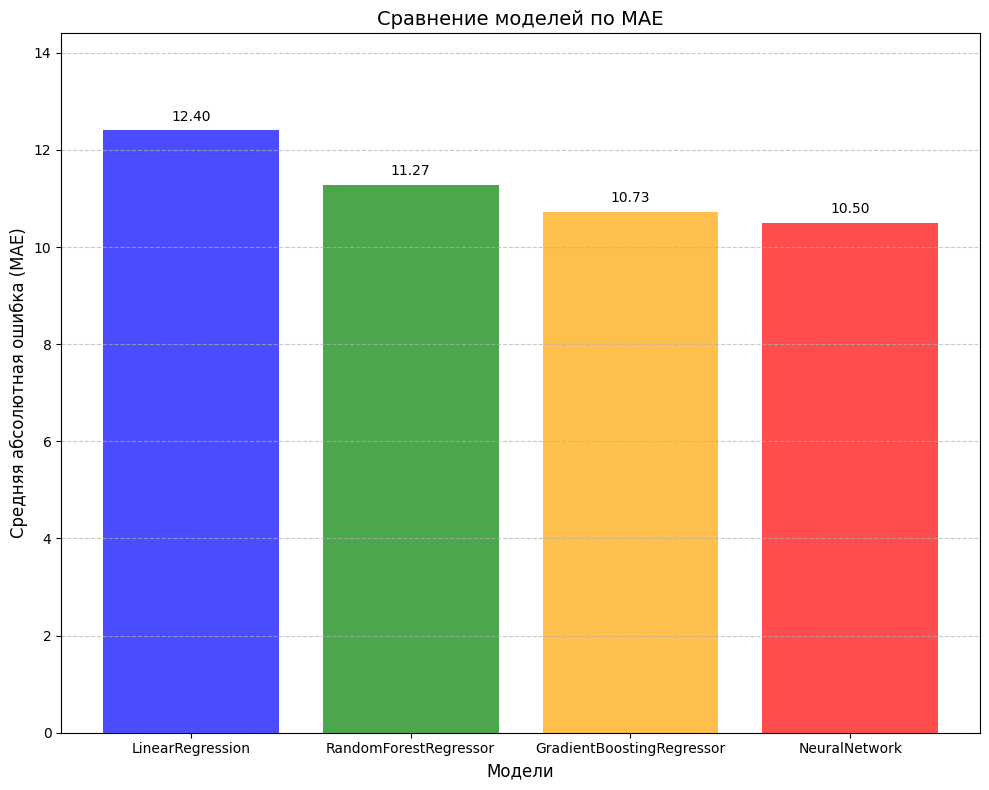

In [397]:
import matplotlib.pyplot as plt

models = ['LinearRegression', 'RandomForestRegressor', 'GradientBoostingRegressor', 'NeuralNetwork']
mae_values = [lr_mae, rf_mae, gbr_mae, nn_mae]

plt.figure(figsize=(10, 8))
plt.bar(models, mae_values, color=['blue', 'green', 'orange', 'red'], alpha=0.7)

plt.title('Сравнение моделей по MAE', fontsize=14)
plt.ylabel('Средняя абсолютная ошибка (MAE)', fontsize=12)
plt.xlabel('Модели', fontsize=12)
plt.ylim(0, max(mae_values) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(mae_values):
    plt.text(i, v + 0.2, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Значение MAE слабо отличаются в зависимости от модели, что может говорить о том что текущие признаки слабо объясняют таргет. Тем немее лучший резльтат показал NeuralNetwork, так же неплохо справилась GradientBoostingRegressor

Теперь сравним модели по значеням MSE и RMSE

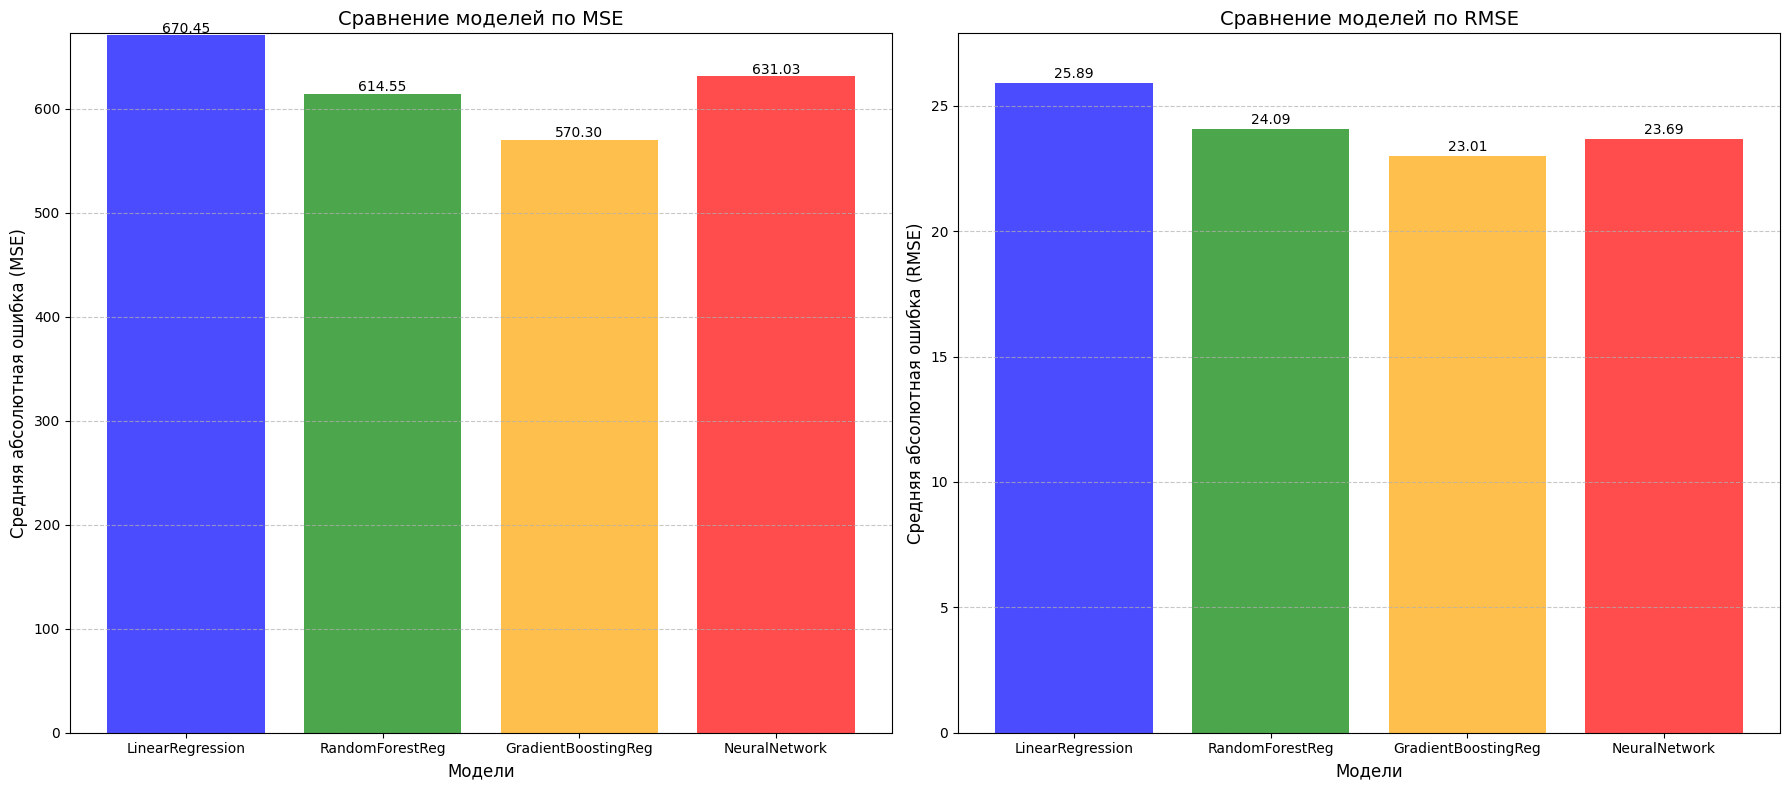

In [398]:
import matplotlib.pyplot as plt

models = ['LinearRegression', 'RandomForestReg', 'GradientBoostingReg', 'NeuralNetwork']
mse_values = [lr_mean_mse, rf_mse, gbr_mse, nn_mse]

rmse_values = [lr_mean_rmse, rf_rmse, gbr_rmse, nn_rmse]

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

axes[0].bar(models, mse_values, color=['blue', 'green', 'orange', 'red'], alpha=0.7)
axes[0].set_title('Сравнение моделей по MSE', fontsize=14)
axes[0].set_ylabel('Средняя абсолютная ошибка (MSE)', fontsize=12)
axes[0].set_xlabel('Модели', fontsize=12)
axes[0].set_ylim(0, max(mse_values) + 2)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(mse_values):
    axes[0].text(i, v + 2, f'{v:.2f}', ha='center', fontsize=10)

axes[1].bar(models, rmse_values, color=['blue', 'green', 'orange', 'red'], alpha=0.7)
axes[1].set_title('Сравнение моделей по RMSE', fontsize=14)
axes[1].set_ylabel('Средняя абсолютная ошибка (RMSE)', fontsize=12)
axes[1].set_xlabel('Модели', fontsize=12)
axes[1].set_ylim(0, max(rmse_values) + 2)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(rmse_values):
    axes[1].text(i, v + 0.2, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Значение MSE и RMSE тоже почти не оличаются. Лучшей в этом случае оказалась модель GradientBoostingRegressor

Теперь посмотрим на R2

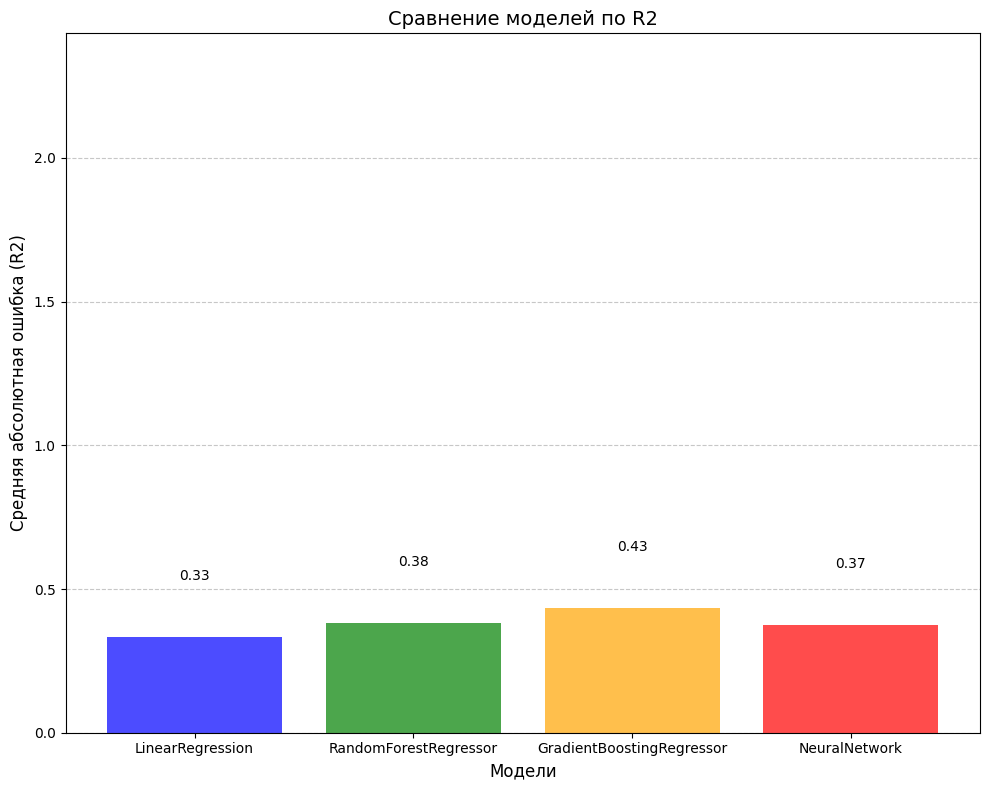

In [399]:
import matplotlib.pyplot as plt

models = ['LinearRegression', 'RandomForestRegressor', 'GradientBoostingRegressor', 'NeuralNetwork']
mae_values = [lr_mean_r2, rf_r2, gbr_r2, nn_r2]

plt.figure(figsize=(10, 8))
plt.bar(models, mae_values, color=['blue', 'green', 'orange', 'red'], alpha=0.7)

plt.title('Сравнение моделей по R2', fontsize=14)
plt.ylabel('Средняя абсолютная ошибка (R2)', fontsize=12)
plt.xlabel('Модели', fontsize=12)
plt.ylim(0, max(mae_values) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(mae_values):
    plt.text(i, v + 0.2, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Лушей моделью хоть и с небольшим отрывом оказалась GradientBoostingRegressor

# ВЫВОД
По итогу мы получили среднюю абсолютную ошибку MAE около 10.5, MSE около 571, а R2 примерно 0,44. Для наших данных это не лучший результат, но нужно учитывать что популярность фильмов зависит от множества факторов, не учтенных в текущем наборе данных. Например, такие как влияние социальных медиа, рекламных кампаний, особенностей платформ и текущих трендов.

Если же полученные значения ошибок нас не уcтраивают и нам нужно уменьшить их, то для этого есть несколько опций:

*   Попробовать создать другие параметры на основе имеющихся, возможно с ними результат будет лучше.
*   Попробовать еще улучшить модели, подобрав другие гиперпараметры, либо скомбинировать несколько моделей через ансамблирование.
*   Добавить внешние признаки. Данные, такие как активность рекаламный компаний, текущие тренды, такие признаки могут значительно повысить точность модели.

